In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline
%pylab
%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# Parte I: Exploración, limpieza, selección de variables, entre otros.

En esta sección se realiza la preparación de los datos. Limpieza del dataframe por valores nulos, renombrado de variables, cálculo de nuevas variables, descarte de variables que no forman parte de análisis, entre otros.

## Analisis exploratorio

In [2]:
data = pd.read_csv('../Nuevas_variables/v5/input_extendidov5.csv')
data.head(10)

,Unnamed: 0,Date,Year,Season,local_team,visitor_team,Points,Opponent_Points,Result,LOCAL_Racha,...,local_played_visitor,visitor_played_visitor,visitor_played_local,place_local_played,place_visitor_played,avg_distance_place_visitor_played,avg_distance_place_local_played,distance_between_stadiums,distance_local_traveled,distance_visitor_traveled
0,0,Oct 30,2015,2016,Philadelphia 76ers,Utah Jazz,71,99,1,-1,...,1,1,0,Boston Celtics,Detroit Pistons,313.5,822.000000,2964.0,1644.0,627.0
1,1,Nov 2,2015,2016,Philadelphia 76ers,Cleveland Cavaliers,100,107,1,-2,...,0,0,1,Philadelphia 76ers,Cleveland Cavaliers,488.0,0.000000,1464.0,0.0,1464.0
2,2,Nov 7,2015,2016,Philadelphia 76ers,Orlando Magic,97,105,1,-5,...,1,0,1,Cleveland Cavaliers,Orlando Magic,1806.0,1464.000000,1806.0,1464.0,1806.0
3,3,Nov 9,2015,2016,Philadelphia 76ers,Chicago Bulls,88,111,1,-6,...,0,0,1,Philadelphia 76ers,Chicago Bulls,501.0,0.000000,1002.0,0.0,1002.0
4,4,Nov 11,2015,2016,Philadelphia 76ers,Toronto Raptors,103,119,1,-7,...,0,0,1,Philadelphia 76ers,Toronto Raptors,301.0,0.000000,301.0,0.0,301.0
5,5,Nov 16,2015,2016,Philadelphia 76ers,Dallas Mavericks,86,92,1,-10,...,1,1,0,San Antonio Spurs,Houston Rockets,285.0,3841.000000,314.0,7682.0,570.0
6,6,Nov 18,2015,2016,Philadelphia 76ers,Indiana Pacers,85,112,1,-11,...,0,1,0,Philadelphia 76ers,Chicago Bulls,501.0,0.000000,990.0,0.0,1002.0
7,7,Dec 1,2015,2016,Philadelphia 76ers,Los Angeles Lakers,103,91,0,-18,...,1,0,1,Memphis Grizzlies,Los Angeles Lakers,2003.0,135.500000,4006.0,271.0,4006.0
8,8,Dec 5,2015,2016,Philadelphia 76ers,Denver Nuggets,105,108,1,-1,...,1,1,0,New York Knicks,Toronto Raptors,150.5,135.666667,1349.0,407.0,301.0
9,9,Dec 7,2015,2016,Philadelphia 76ers,San Antonio Spurs,68,119,1,-2,...,0,0,1,Philadelphia 76ers,San Antonio Spurs,3841.0,0.000000,7682.0,0.0,7682.0


In [3]:
len(data)

6220

In [4]:
data = data.dropna()
len(data)

5891

In [5]:
for column in data.columns:
    print(column)

Unnamed: 0
Date
Year
Season
local_team
visitor_team
Points
Opponent_Points
Result
LOCAL_Racha
ID Partido
LOCAL_Ultimos10Victorias
LOCAL_Ultimos10Derrotas
VISITANTE_Ultimos10Victorias
VISITANTE_Ultimos10Derrotas
VISITANTE_Racha
local_Conf_position
local_Win
local_Lose
local_Percentagewl
local_Dif_leader
local_Home_win
local_Home_lose
local_Away_win
local_Away_lose
local_Div_win
local_Div_lose
local_Cnf_win
local_Cnf_lose
local_Icf_win
local_Icf_lose
visitor_Conf_position
visitor_Win
visitor_Lose
visitor_Percentagewl
visitor_Dif_leader
visitor_Home_win
visitor_Home_lose
visitor_Away_win
visitor_Away_lose
visitor_Div_win
visitor_Div_lose
visitor_Cnf_win
visitor_Cnf_lose
visitor_Icf_win
visitor_Icf_lose
local_fg
local_fga
local_fg3
local_fg3a
local_ft
local_fta
local_orb
local_drb
local_trb
local_ast
local_stl
local_blk
local_tov
local_pf
local_pts
local_ft_pct
local_fg_pct
local_fg3_pct
visitor_fg
visitor_fga
visitor_fg3
visitor_fg3a
visitor_ft
visitor_fta
visitor_orb
visitor_drb
visitor_

## Calculo de variables compuestas

Indicar en el estudio la seleccion de variables por logica del modelo, y comentar aquellas observadas en estudios previos que no tienen ningun sentido incluir

Por ejemplo la ilogica inclusion de la diferencia_visitante_point observado en estudios previos

In [6]:
# VARIABLE MAL CALCULADA, ESPERA DE ARREGLO POR PARTE DE VICTOR
data["Result1"] = 1

data["Result1"] = np.where(data["Opponent_Points"] > data["Points"], 0, 1)

In [7]:
# COMENTAR A VICTOR ARREGLAR EL NOMBRE DE LAS VARIABLES


data.rename(columns={'Result1': 'target'}, inplace=True)


data['local_visitor_dif_pts'] = data['local_pts'] - data['visitor_pts']

data['LOCAL_porcentaje_victoria_Ultimos10'] = (data['LOCAL_Ultimos10Victorias']) / (data['LOCAL_Ultimos10Victorias'] + data['LOCAL_Ultimos10Derrotas'])
data['VISITANTE_porcentaje_victoria_Ultimos10'] = (data['VISITANTE_Ultimos10Victorias']) / (data['VISITANTE_Ultimos10Victorias'] + data['VISITANTE_Ultimos10Derrotas'])

# COMENTAR A VICTOR SI ES POSIBLE SACAR ESTAS VARIABLES, PREVIAMENTE SON MAS IMPORTANTES QUE 
# LOCAL_porcentajeVictorias O local_Percentagewl

data['LOCAL_porcentaje_victoria_LOCAL'] = (data['local_Home_win']) / (data['local_Home_win'] + data['local_Home_lose'])
data['VISITANTE_porcentaje_victoria_VISITANTE'] = (data['visitor_Home_win']) / (data['visitor_Home_win'] + data['visitor_Home_lose'])


In [8]:
# aqui pasa algo raro con los denominadores de las variables que hace INDETERMINADO los calculos y lleva luego a NA

data = data.dropna()
len(data) 

5809

## Transformacion de variables categoricas

Estrictamente necesario transformar las variables categoricas para modelar con las librerias de Python que estamos utilizando.

Distintos enfoques para trabajar variables categoricas: https://pbpython.com/categorical-encoding.html

Trabajar con variables categoricas en Machine Learning: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/


## ¿"Maldición de la dimensionalidad"?

¿Un posible problema por la escasez de datos y la alta dimensionalidad del modelo? Cerca de 100 variables previo a selección (pendiente de profundizar) 

https://en.wikipedia.org/wiki/Curse_of_dimensionality#Machine_learning

In [9]:
data = pd.get_dummies(data, columns=['Local_Conferencia', 'Local_Division'],
               prefix=['Conf_local', 'Div_local'])

data = pd.get_dummies(data, columns=['Visitor_Conferencia', 'Visitor_Division'],
               prefix=['Conf_visitor', 'Div_visitor'])

data.rename(columns={'Div_local_Atlantic Division':'Div_local_Atlantic',
                    'Div_local_Central Division': 'Div_local_Central',
                    'Div_local_Northwest Division': 'Div_local_Northwest',
                    'Div_local_Pacific Division': 'Div_local_Pacific',
                    'Div_local_Southeast Division': 'Div_local_Southeast',
                    'Div_local_Southwest Division': 'Div_local_Southwest'},inplace=True)

data.rename(columns={'Div_visitor_Atlantic Division':'Div_visitor_Atlantic',
                    'Div_visitor_Central Division': 'Div_visitor_Central',
                    'Div_visitor_Northwest Division': 'Div_visitor_Northwest',
                    'Div_visitor_Pacific Division': 'Div_visitor_Pacific',
                    'Div_visitor_Southeast Division': 'Div_visitor_Southeast',
                    'Div_visitor_Southwest Division': 'Div_visitor_Southwest'},inplace=True)


In [10]:
# Seleccion de variables para análisis de correlación

local = []
def filter_local_name(name):
    if 'Local' in name:
      return name
    if 'LOCAL' in name:
        return name
    if 'local' in name:
        return name
    
for variable in data.columns:
    if (filter_local_name(variable) != None):
        local.append(variable)
print(local)

['local_team', 'LOCAL_Racha', 'LOCAL_Ultimos10Victorias', 'LOCAL_Ultimos10Derrotas', 'local_Conf_position', 'local_Win', 'local_Lose', 'local_Percentagewl', 'local_Dif_leader', 'local_Home_win', 'local_Home_lose', 'local_Away_win', 'local_Away_lose', 'local_Div_win', 'local_Div_lose', 'local_Cnf_win', 'local_Cnf_lose', 'local_Icf_win', 'local_Icf_lose', 'local_fg', 'local_fga', 'local_fg3', 'local_fg3a', 'local_ft', 'local_fta', 'local_orb', 'local_drb', 'local_trb', 'local_ast', 'local_stl', 'local_blk', 'local_tov', 'local_pf', 'local_pts', 'local_ft_pct', 'local_fg_pct', 'local_fg3_pct', 'Sueldo local', 'LOCAL_AWS_MEDIO_AGRUPADO', 'local_dif_between_previous_game', 'local_played_previous_date', 'local_played_two_days_ago', 'local_played_three_days_ago', 'local_played_prorrogue_previous_date', 'local_played_prorrogue_two_days_ago', 'local_played_prorrogue_three_days_ago', 'local_played_local', 'local_played_visitor', 'visitor_played_local', 'place_local_played', 'avg_distance_place_l

## Seleccion de Variables por Matriz de Correlación

In [11]:
#Copiamos y pegamos el output del código anterior, incluyendo ahora "target"

game_var_local = ['target', 'local_pts', 'local_visitor_dif_pts', 'local_fg', 'local_fga', 'local_fg3', 
                  'local_fg3a', 'local_ft', 'local_fta', 'local_orb', 'local_drb', 'local_trb', 'local_ast',
                  'local_stl', 'local_blk', 'local_tov','local_pf','local_ft_pct', 'local_fg_pct', 'local_fg3_pct']

game_var_visitante = ['target', 'visitor_pts', 'local_visitor_dif_pts', 'visitor_fg', 'visitor_fga', 
                    'visitor_fg3', 'visitor_fg3a', 'visitor_ft', 'visitor_fta', 'visitor_orb', 'visitor_drb',
                    'visitor_trb', 'visitor_ast','visitor_stl', 'visitor_blk', 'visitor_tov','visitor_pf',
                    'visitor_ft_pct', 'visitor_fg_pct', 'visitor_fg3_pct']


prev_var_local = ['target', 'LOCAL_Racha', 'LOCAL_Ultimos10Victorias', 'LOCAL_Ultimos10Derrotas',
                  'LOCAL_porcentaje_victoria_Ultimos10', 'local_Home_win', 'local_Home_lose', 'local_Percentagewl',
                  'LOCAL_porcentaje_victoria_LOCAL','local_Conf_position','local_Dif_leader','Sueldo local',
                  
                  'local_dif_between_previous_game', 'local_played_local', 
                  'local_played_visitor', 'avg_distance_place_local_played',
                  'distance_between_stadiums', 'distance_local_traveled', 'LOCAL_AWS_MEDIO_AGRUPADO']


prev_var_visitante = ['target', 'VISITANTE_Racha', 'VISITANTE_Ultimos10Victorias', 'VISITANTE_Ultimos10Derrotas',
                      'VISITANTE_porcentaje_victoria_Ultimos10', 'visitor_Home_win', 'visitor_Home_lose',
                      'visitor_Percentagewl','VISITANTE_porcentaje_victoria_VISITANTE','visitor_Conf_position',
                      'visitor_Dif_leader','Sueldo visitante',
                      
                      'visitor_dif_between_previous_game', 'visitor_played_local', 
                      'visitor_played_visitor', 'avg_distance_place_visitor_played',
                      'distance_between_stadiums', 'distance_visitor_traveled', 'VISITOR_AWS_MEDIO_AGRUPADO']


dummy = ['local_played_previous_date','local_played_two_days_ago','local_played_three_days_ago',
         'local_played_prorrogue_previous_date','local_played_prorrogue_two_days_ago',
         'local_played_prorrogue_three_days_ago','Conf_local_Este','Div_local_Atlantic','Div_local_Central',
         'Div_local_Northwest', 'Div_local_Pacific','Div_local_Southeast', 'Div_local_Southwest',
         
         'Conf_visitor_Este','Div_visitor_Atlantic','Div_visitor_Central','Div_visitor_Northwest',
         'Div_visitor_Pacific','Div_visitor_Southeast', 'Div_visitor_Southwest','visitor_played_previous_date',
         'visitor_played_two_days_ago','visitor_played_three_days_ago','visitor_played_prorrogue_previous_date',
         'visitor_played_prorrogue_two_days_ago', 'visitor_played_prorrogue_three_days_ago']



prev_data_local = data[prev_var_local]
prev_data_visitante = data[prev_var_visitante]

game_data_local = data[game_var_local]
game_data_visitante = data[game_var_visitante]

all_variables = game_var_local + game_var_visitante + prev_var_local + prev_var_visitante + dummy

In [12]:
all_variables = list(dict.fromkeys(all_variables)) #drop duplicates
del all_variables[0] #borramos target de la primera posicion

all_variables.append('target') #insertamos target en la ultima posicion

print('Total variables continuas:  '+ str(len(all_variables)))
print('Total variables dummy:  '+ str(len(dummy)))

Total variables continuas:  99
Total variables dummy:  26


### “Garbage in, garbage out”

Hemos eliminado las siguientes variables previo al análisis, se sabe a priori que dado el estudio no enriquecen el modelo en ninguna manera (LOCAL Y VISITANTE):

**'local_team', 'local_Win', 'local_Lose', 'local_Away_win', 'local_Away_lose', 'local_Div_win', 'local_Div_lose', 'local_Cnf_win', 'local_Cnf_lose', 'local_Icf_win', 'local_Icf_lose'**

**'Conf_local_Oeste'** por defecto tiene colinealidad perfecta con 'Conf_local_Este'

Text(0.5, 0.98, 'Distribución de Variables de equipo LOCAL Previos al Partido')

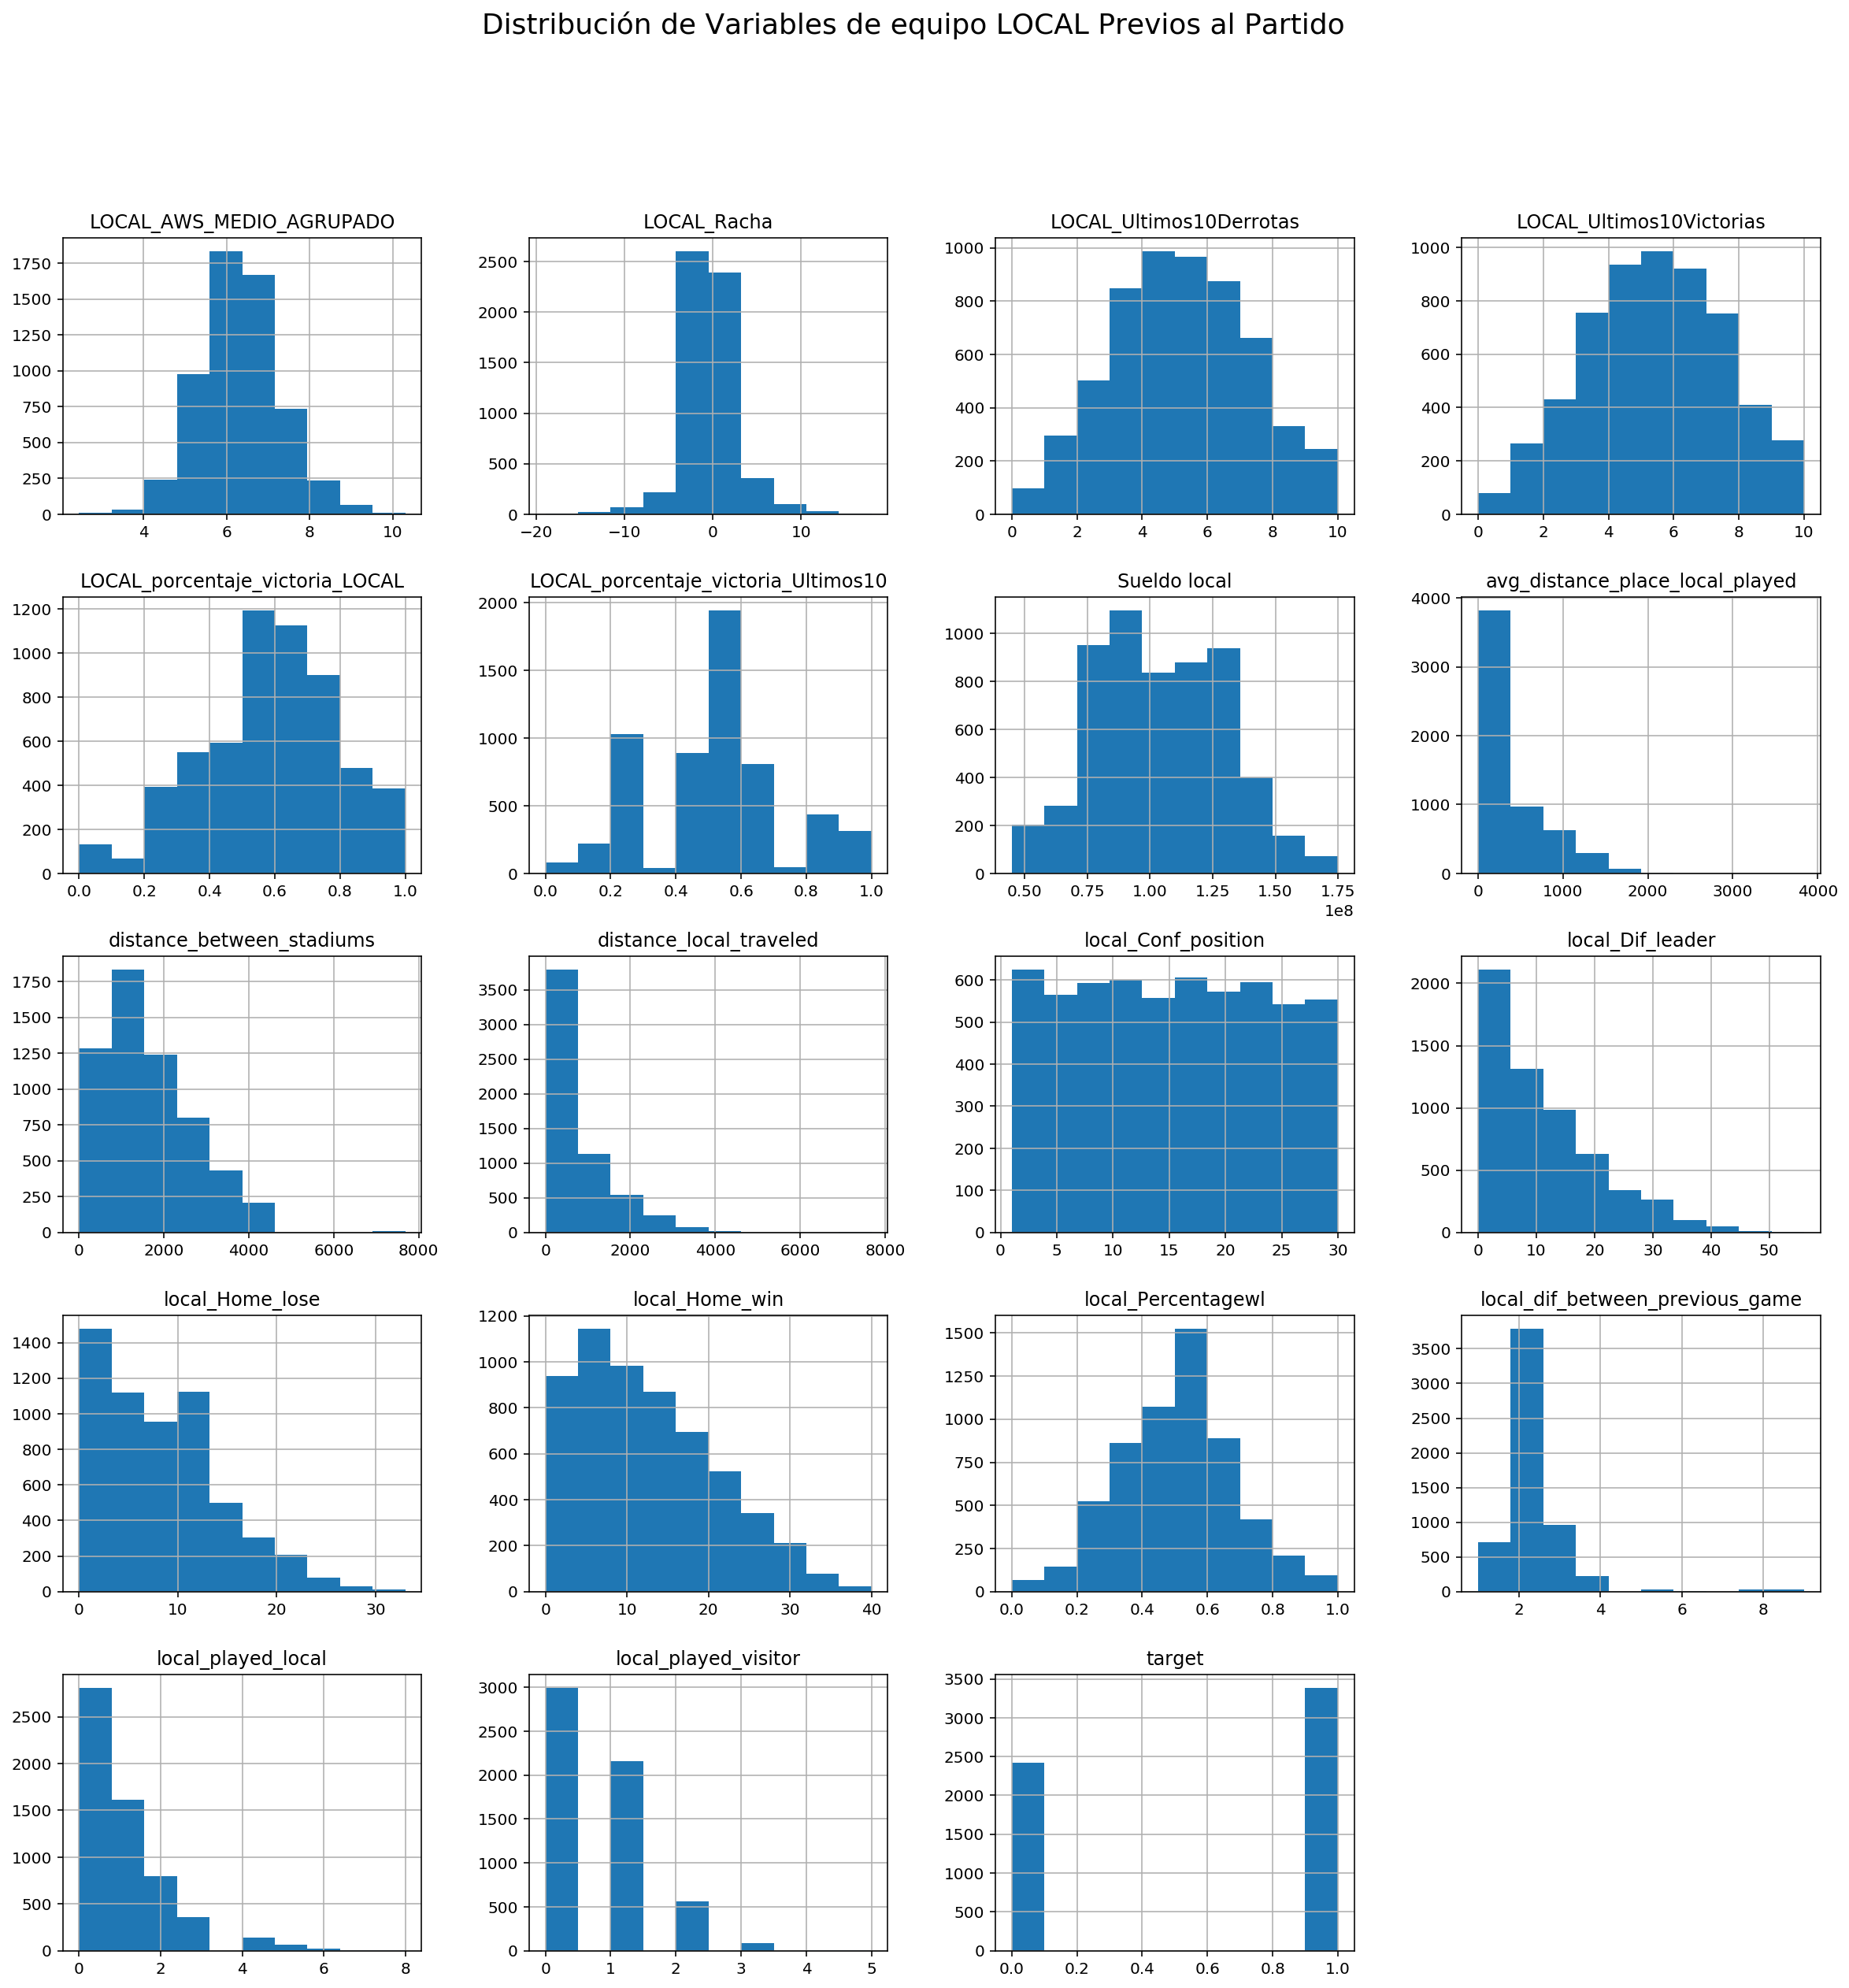

In [13]:
prev_data_local.hist(figsize = (20, 20))
matplotlib.axes.Axes.remove
plt.suptitle('Distribución de Variables de equipo LOCAL Previos al Partido', fontsize = 18)

Text(0.5, 0.98, 'Distribución de Variables de equipo LOCAL a Mitad del Partido')

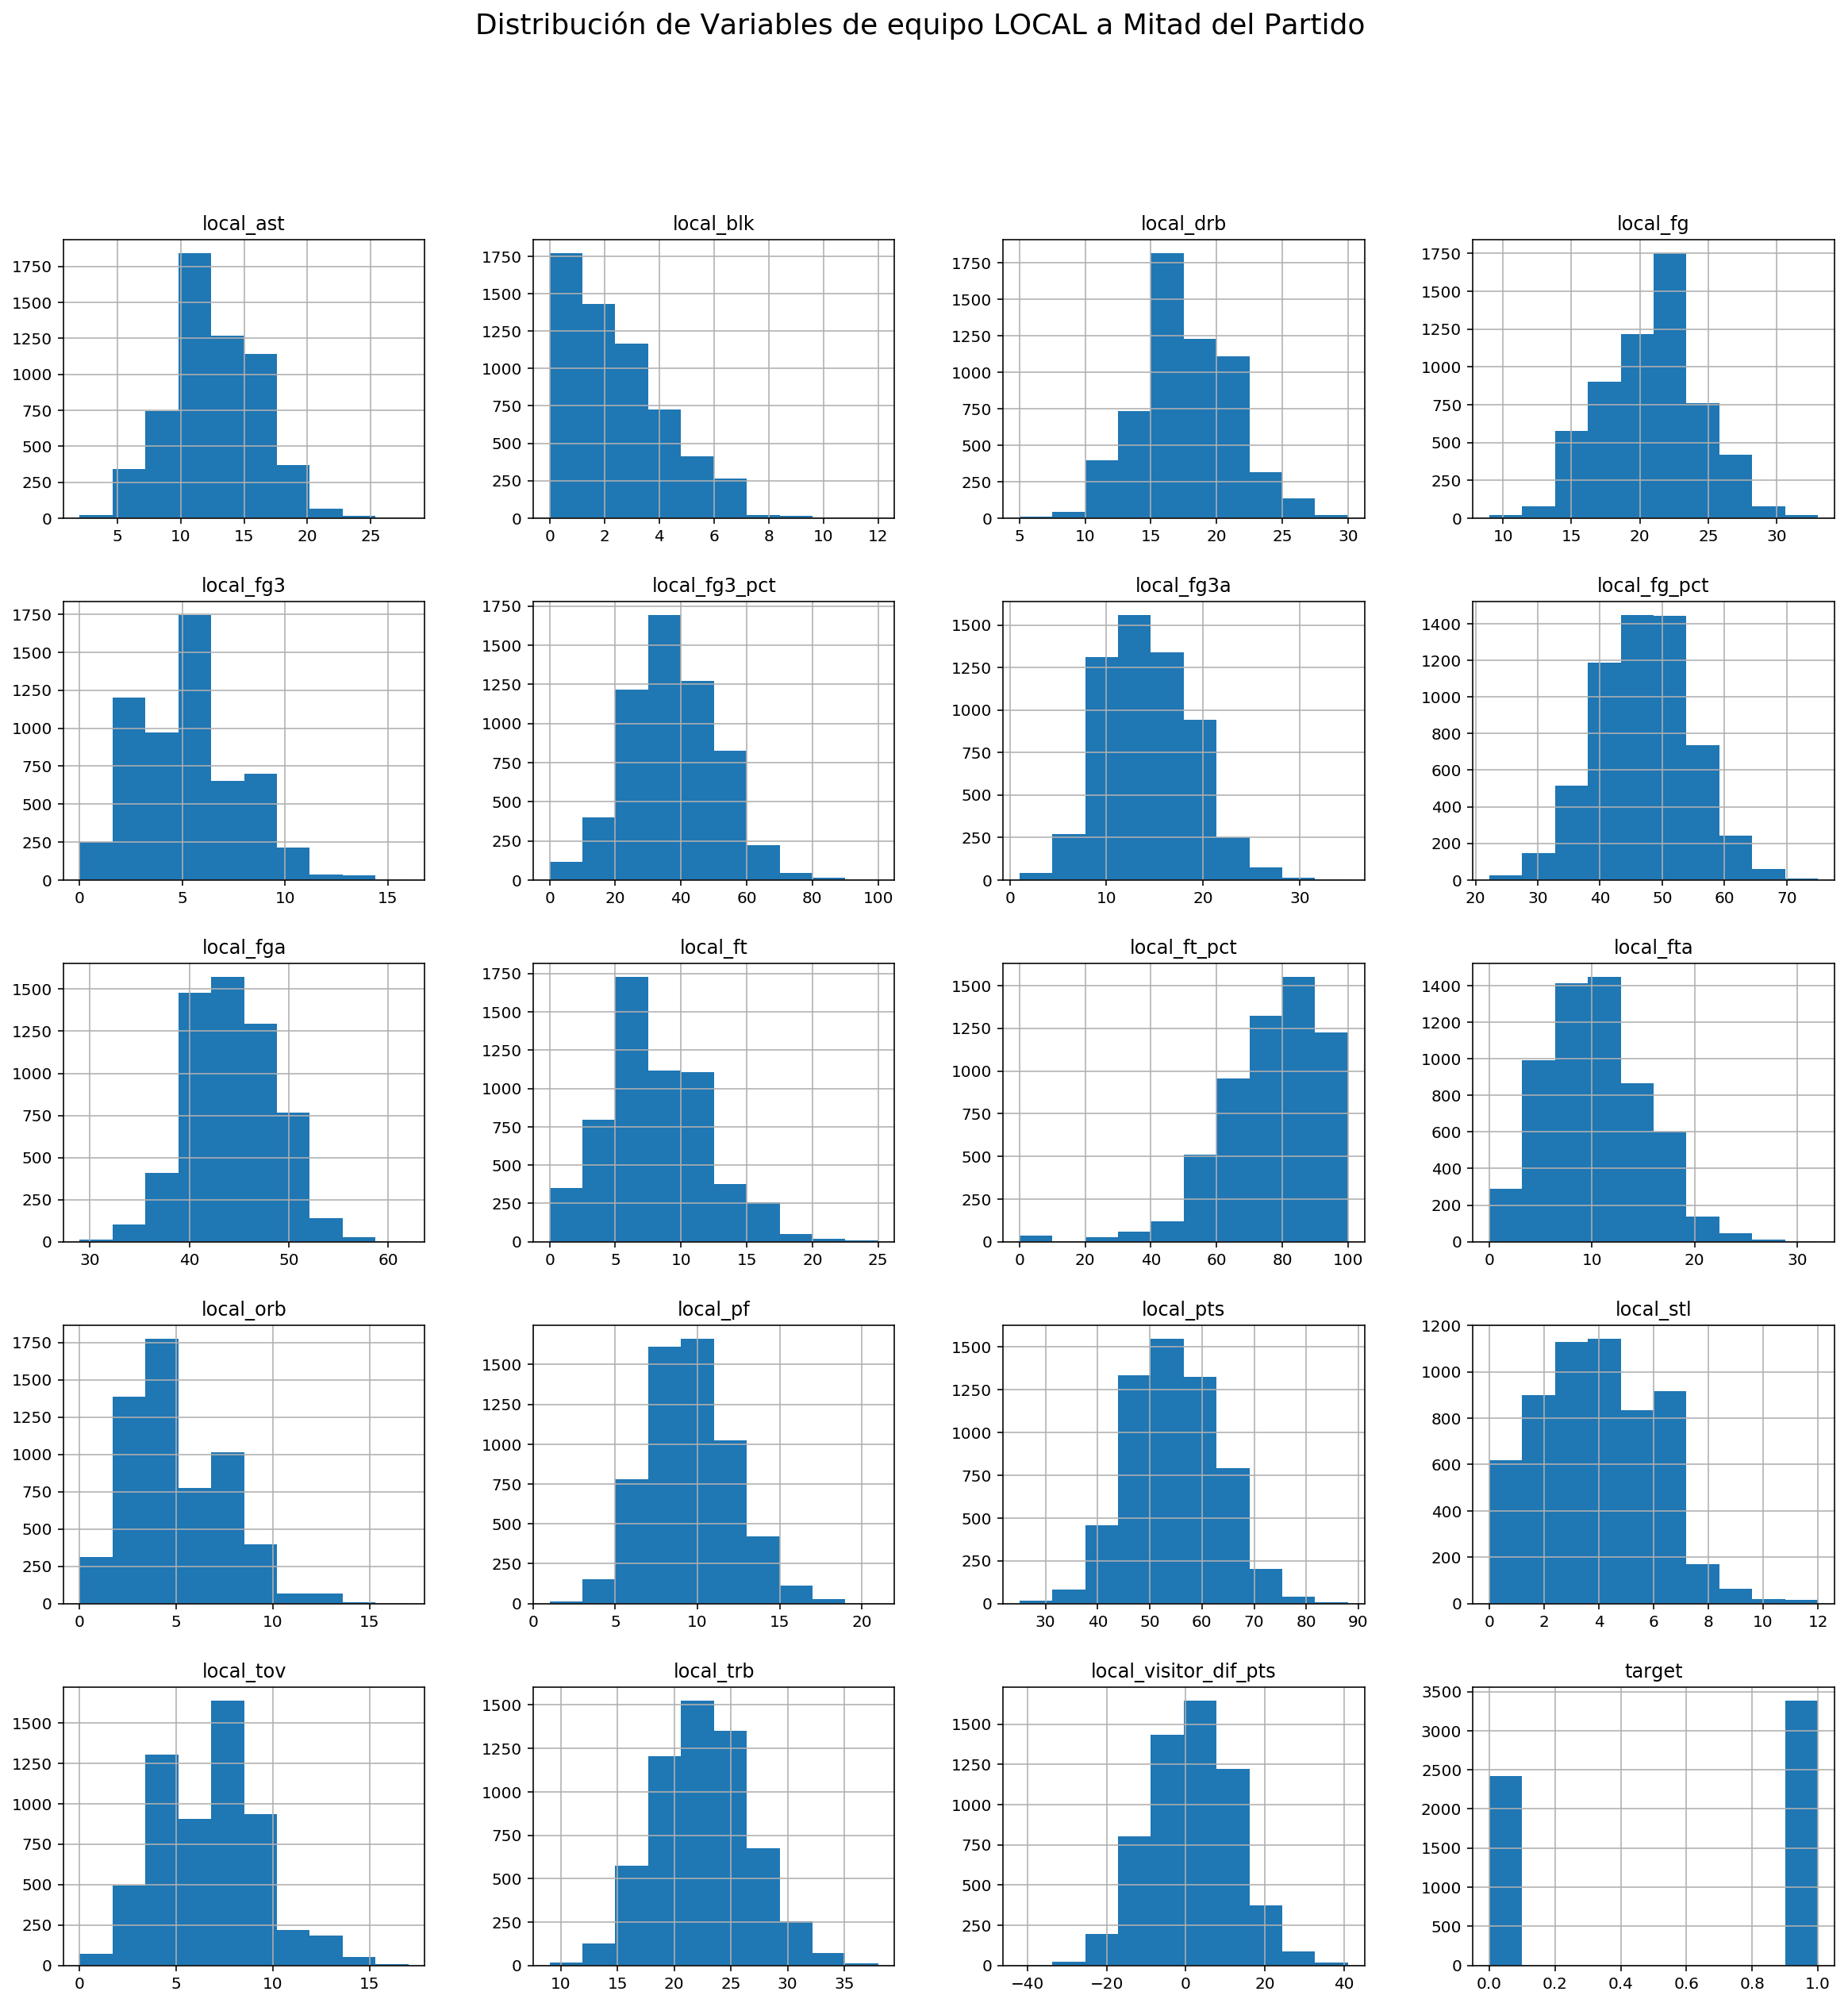

In [14]:
game_data_local.hist(figsize = (20, 20))
matplotlib.axes.Axes.remove
plt.suptitle('Distribución de Variables de equipo LOCAL a Mitad del Partido', fontsize = 18)

Text(0.5, 1.0, 'Matriz de Correlación Previo al Partido LOCAL')

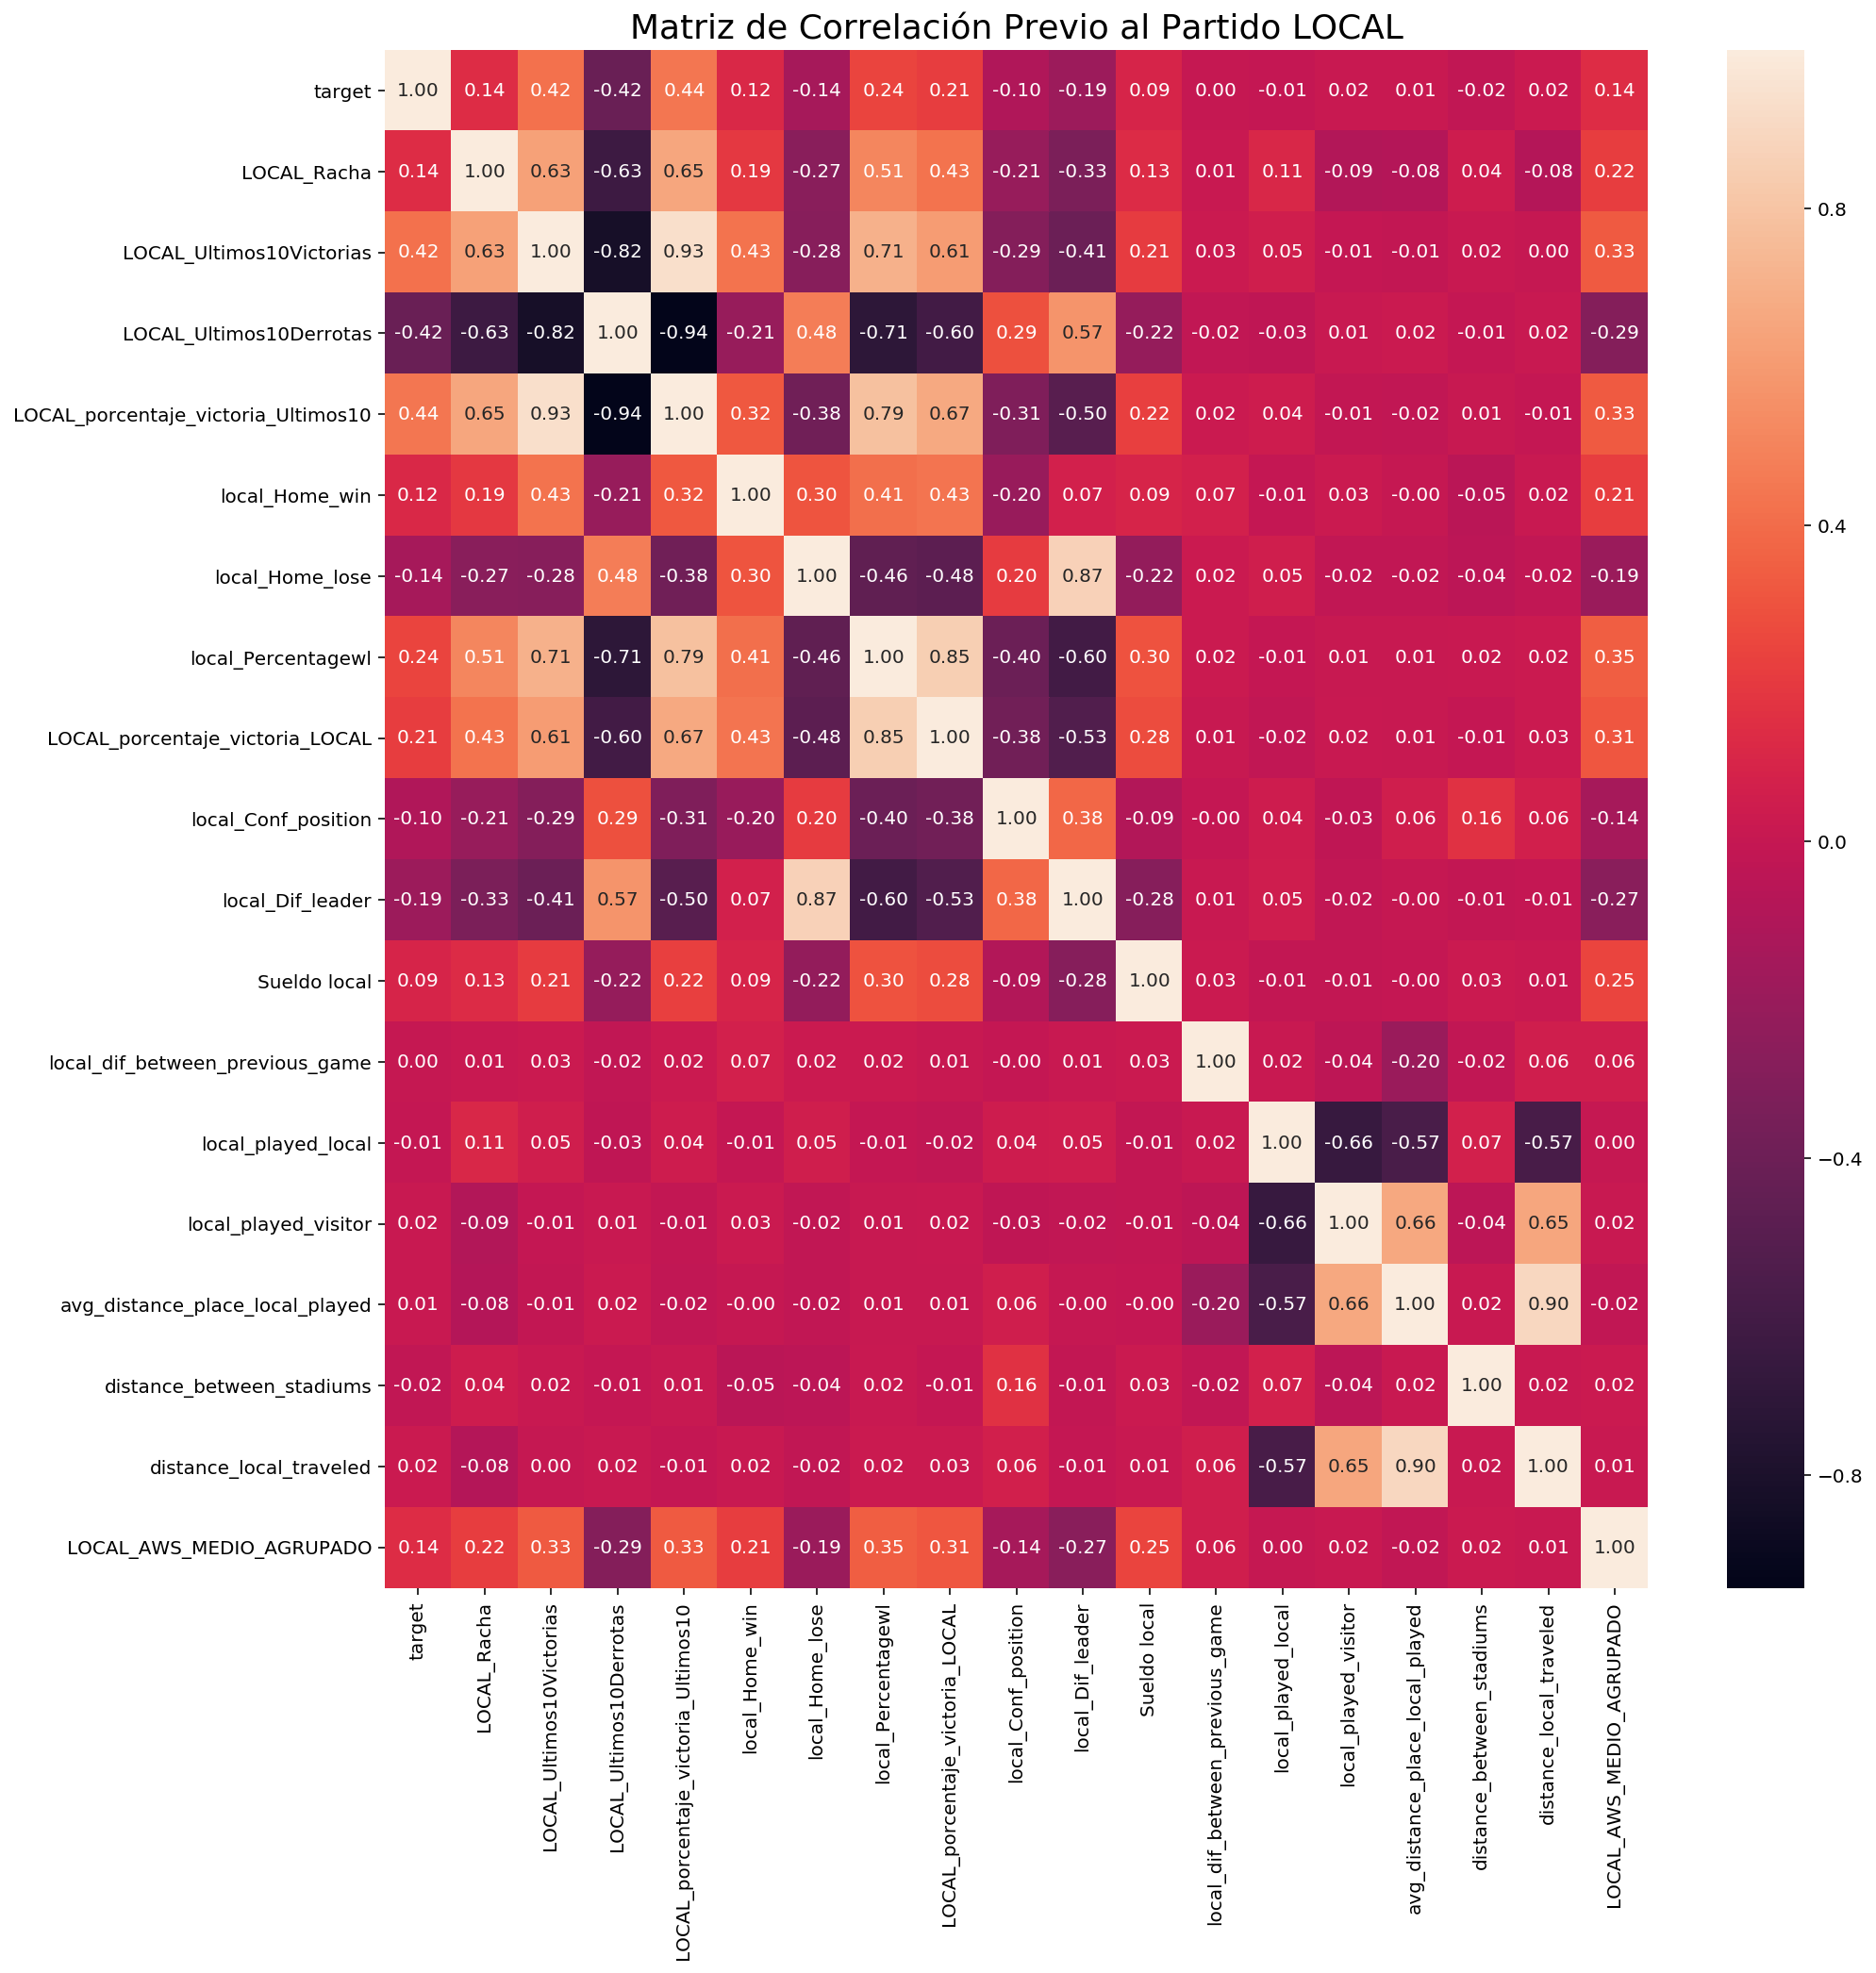

In [15]:
# Heatmap PREV LOCAL
import seaborn as sns
plt.figure(figsize=(15, 15))
sns = sns.heatmap(prev_data_local.corr(), annot=True, fmt='.2f')
sns.set_title('Matriz de Correlación Previo al Partido LOCAL', fontsize=18)

Text(0.5, 1.0, 'Matriz de Correlación Previo al Partido VISITANTE')

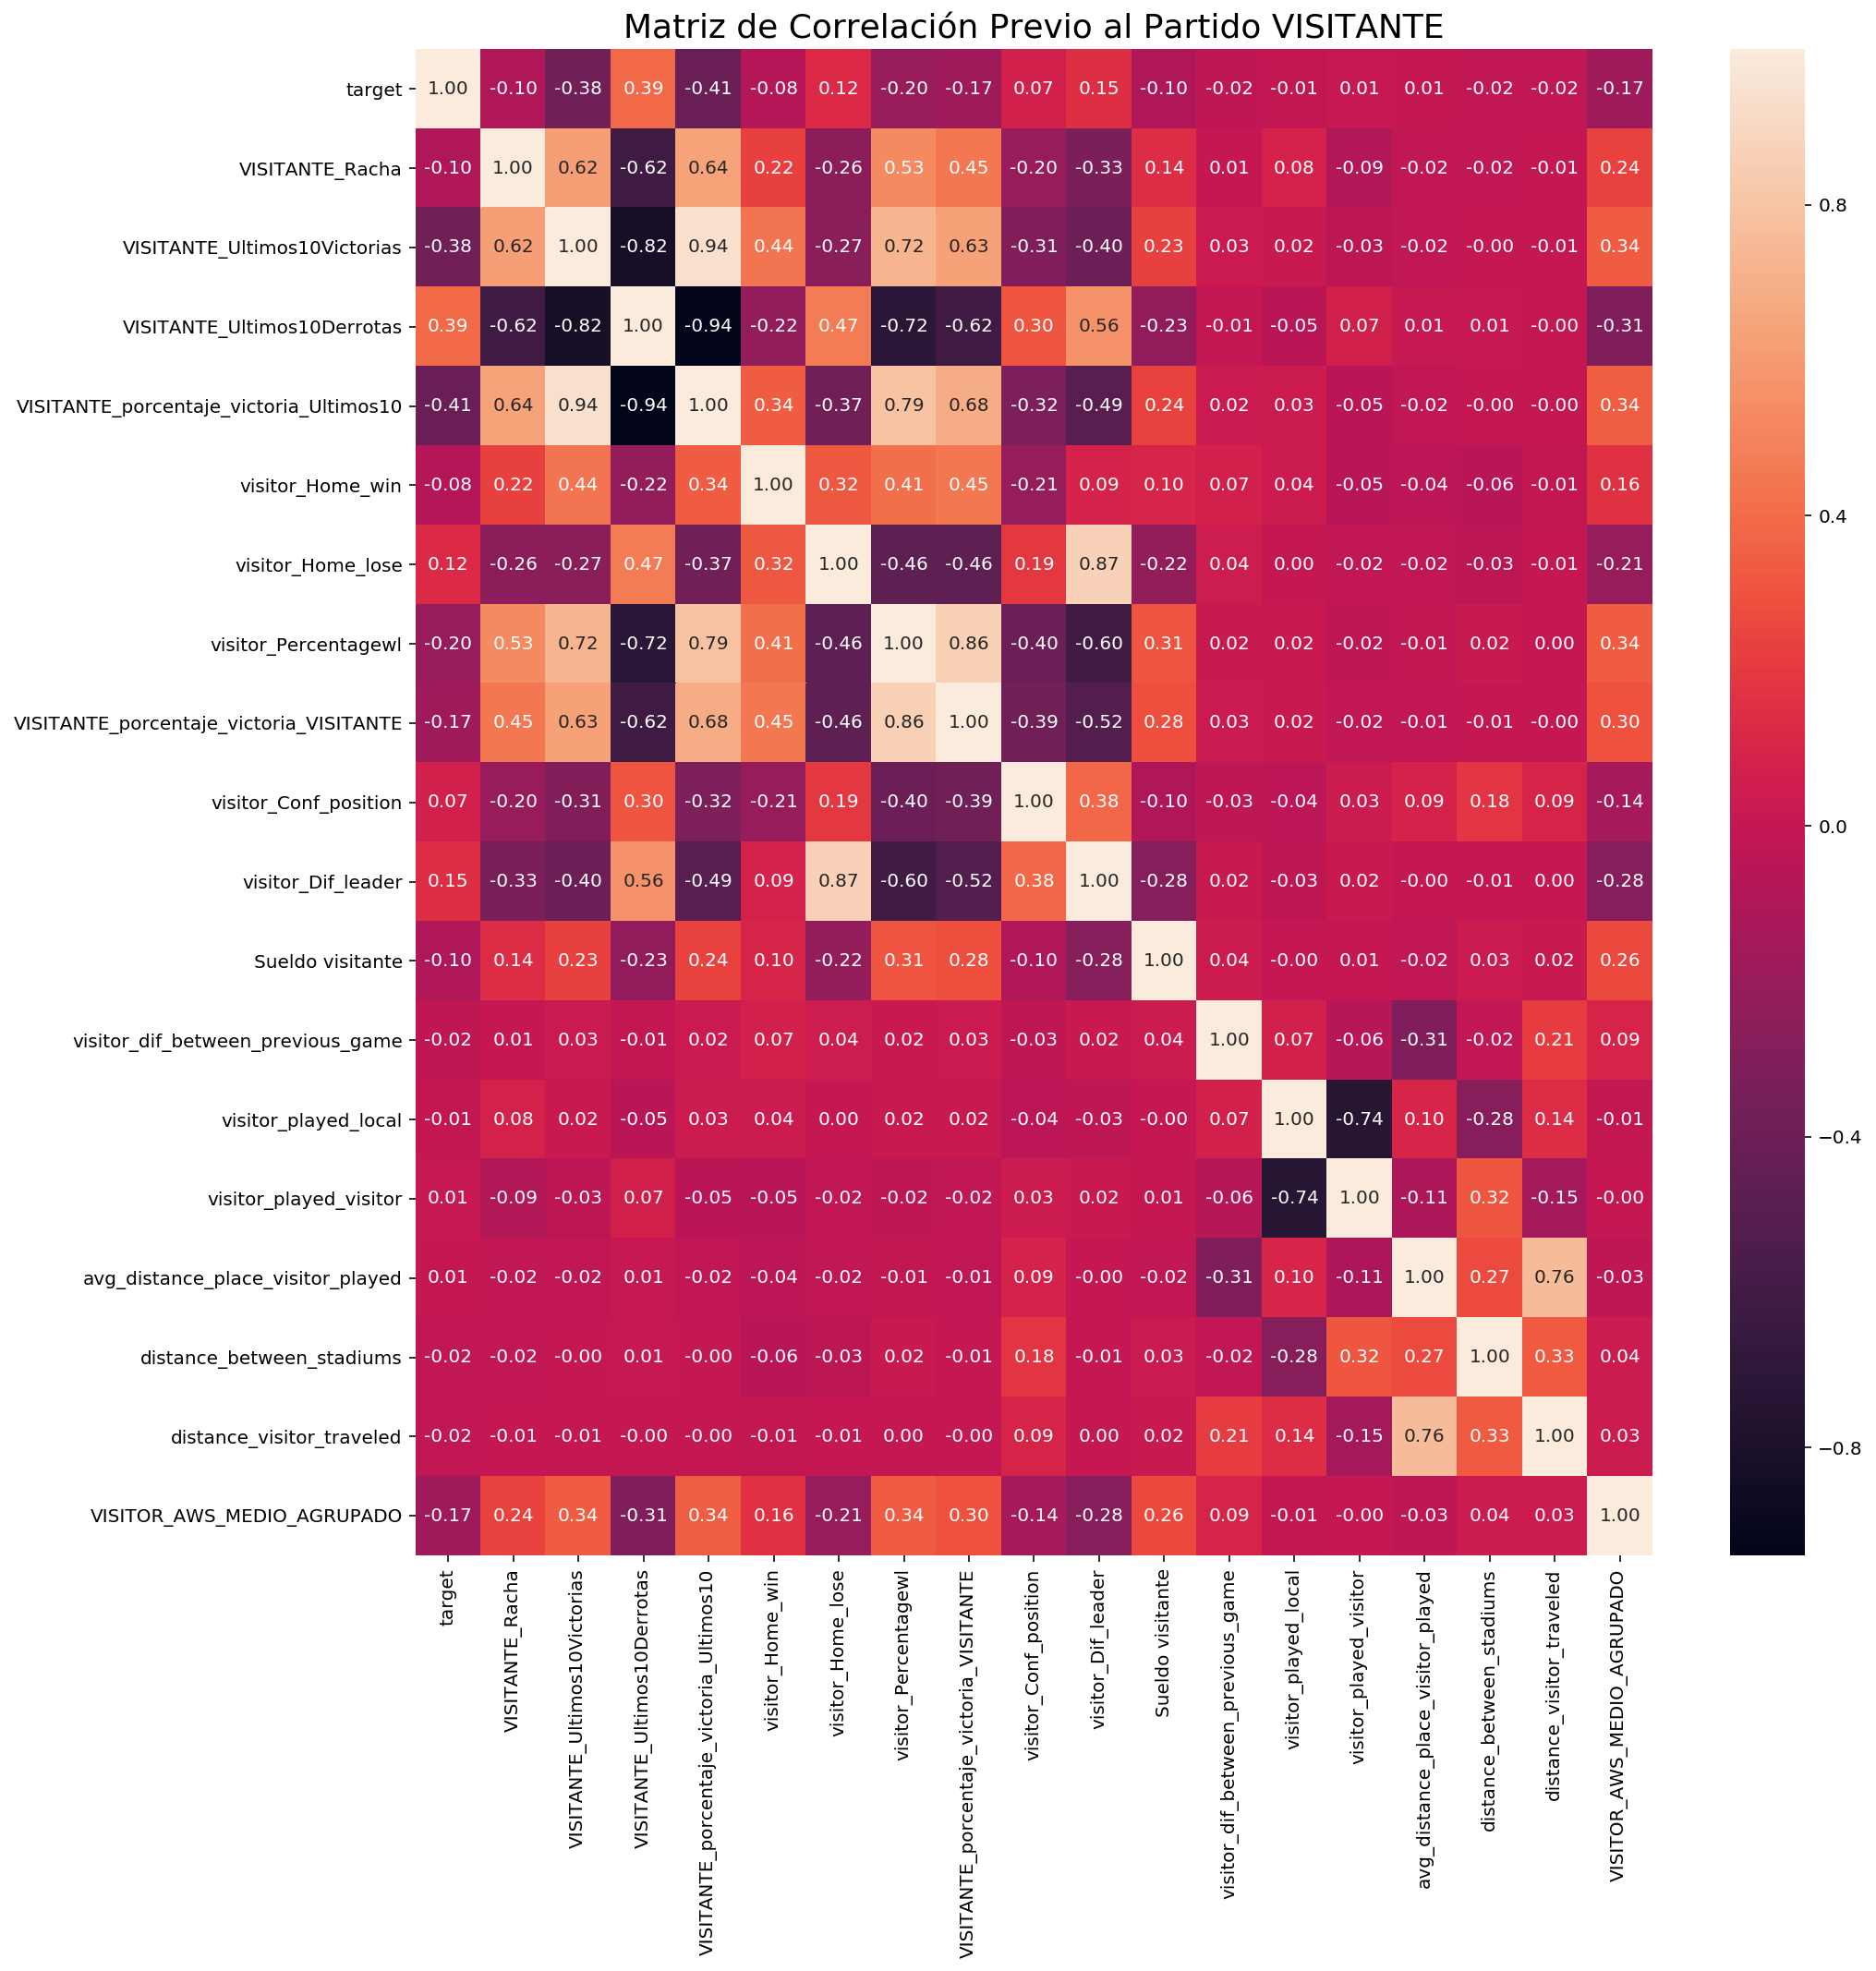

In [16]:
# Heatmap PREV VISITANTE
import seaborn as sns
plt.figure(figsize=(15, 15))
sns_2 = sns.heatmap(prev_data_visitante.corr(), annot=True, fmt='.2f')
sns_2.set_title('Matriz de Correlación Previo al Partido VISITANTE', fontsize=18)

Text(0.5, 1.0, 'Matriz de Correlación Durante el Partido LOCAL')

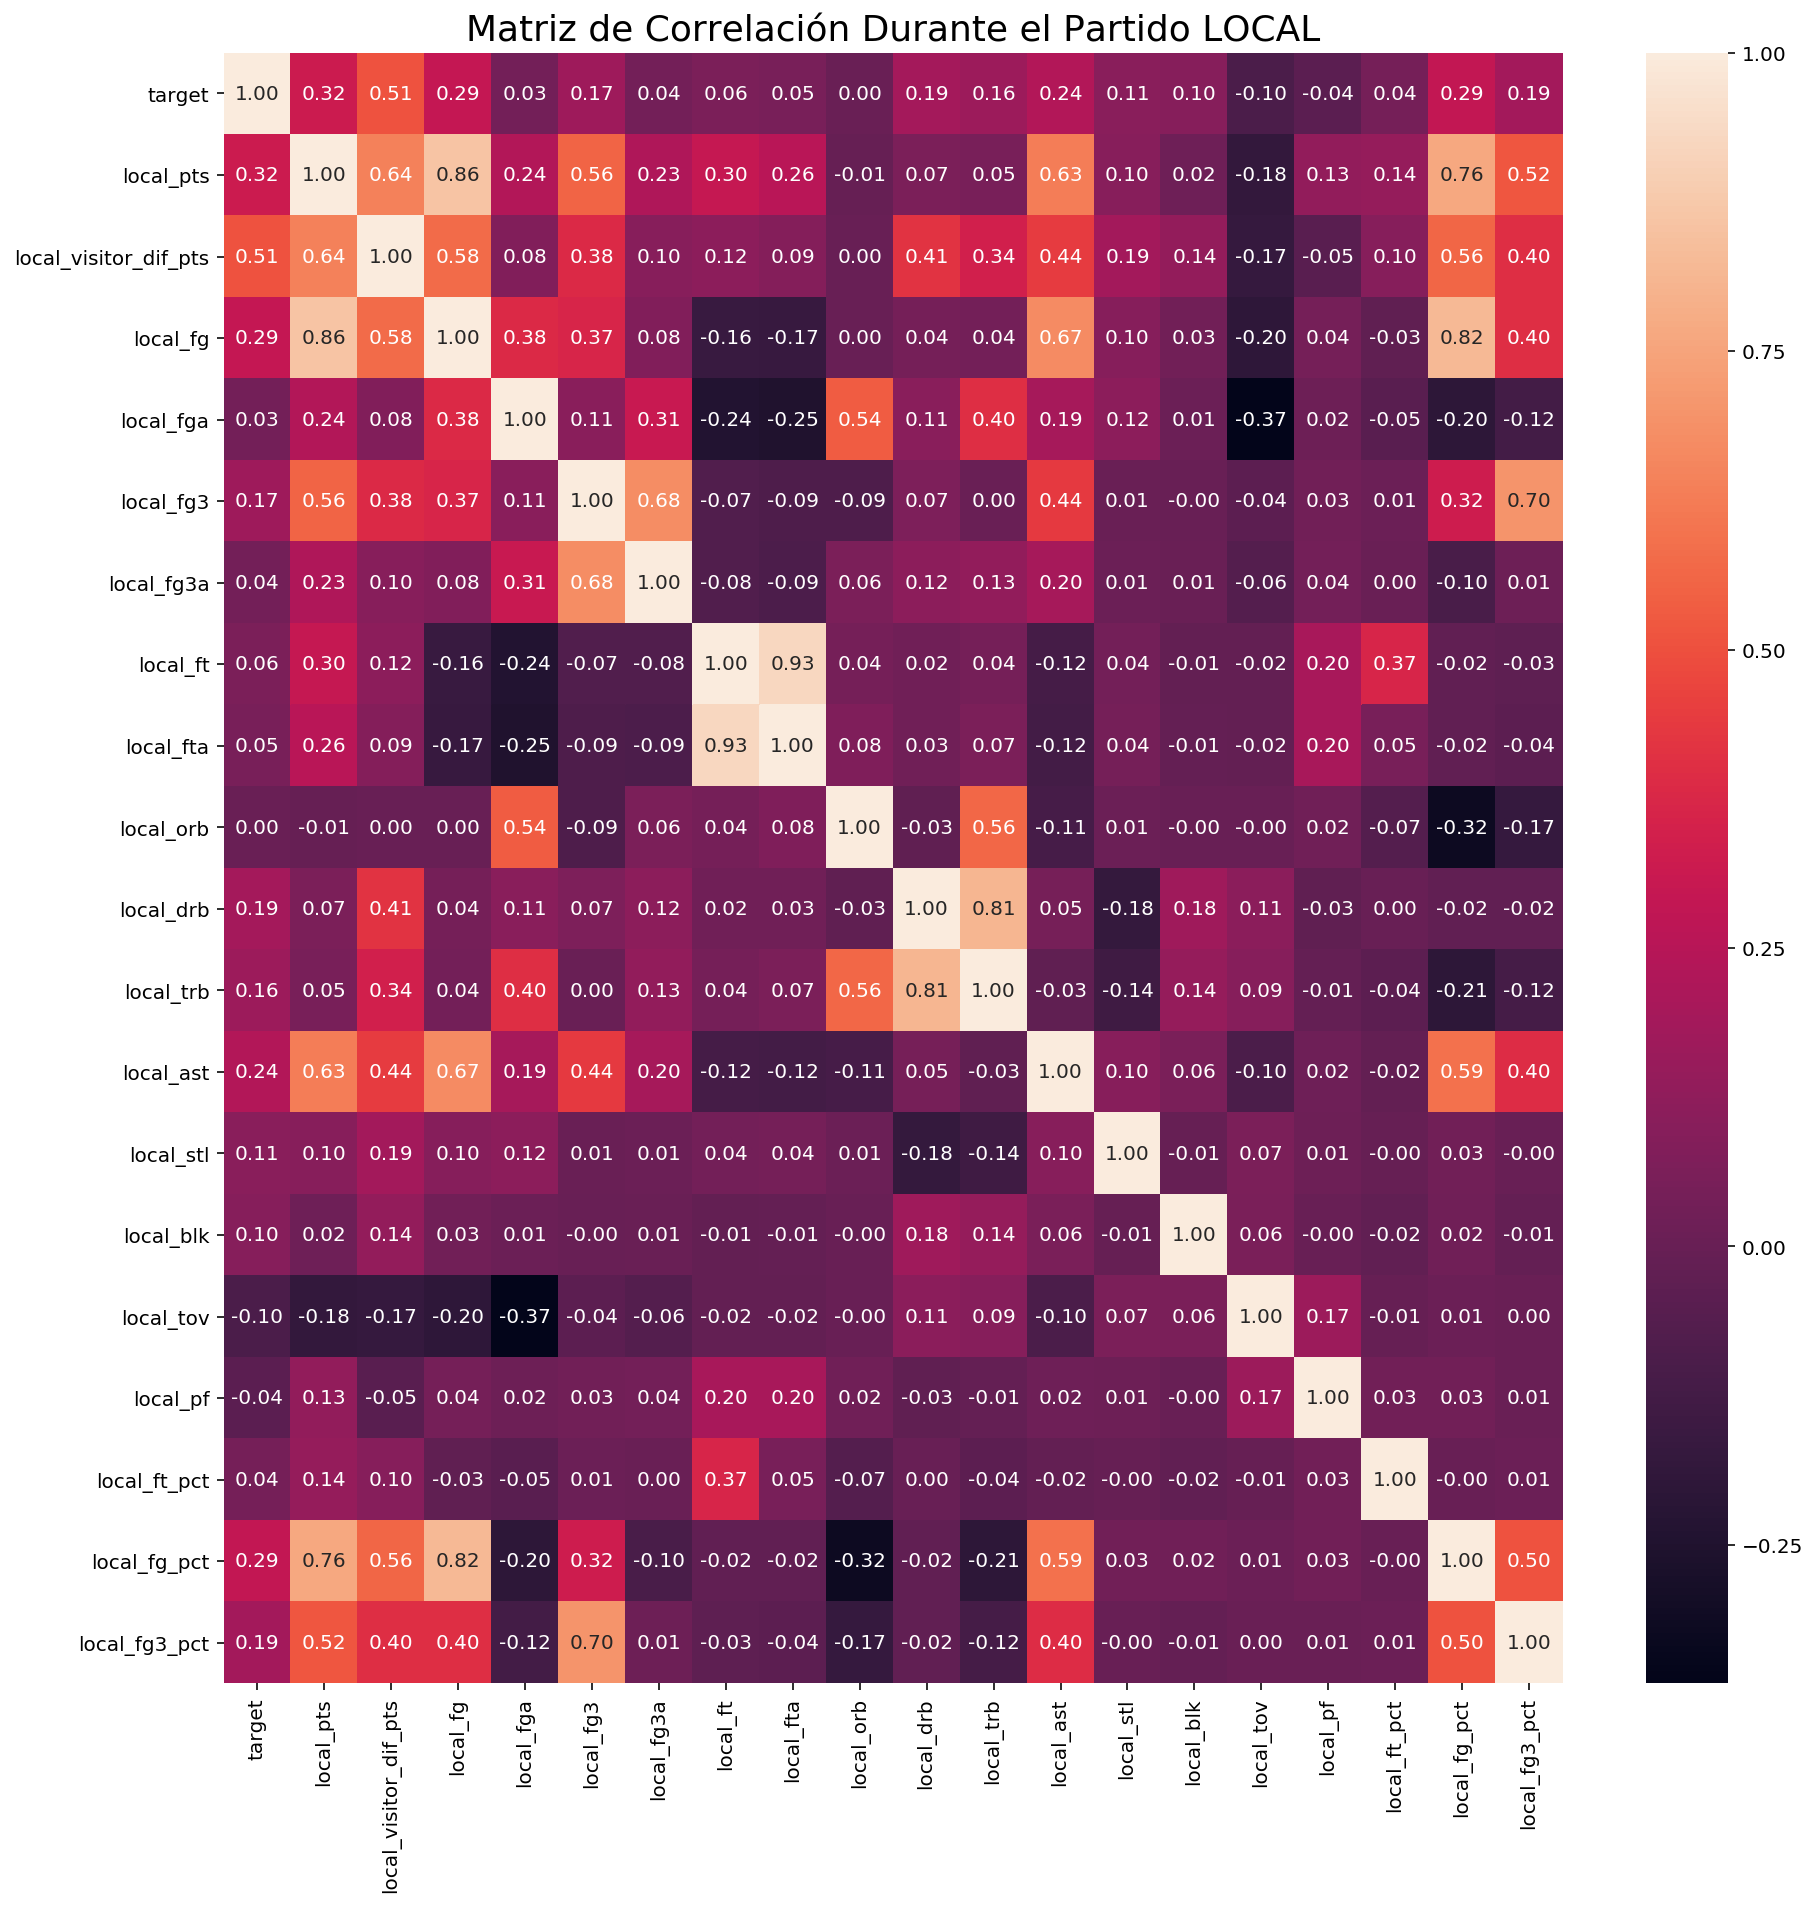

In [17]:
# Heatmap GAME LOCAL
import seaborn as sns
plt.figure(figsize=(15, 15))
sns_3 = sns.heatmap(game_data_local.corr(), annot=True, fmt='.2f')
sns_3.set_title('Matriz de Correlación Durante el Partido LOCAL', fontsize=18)

Text(0.5, 1.0, 'Matriz de Correlación Durante el Partido VISITANTE')

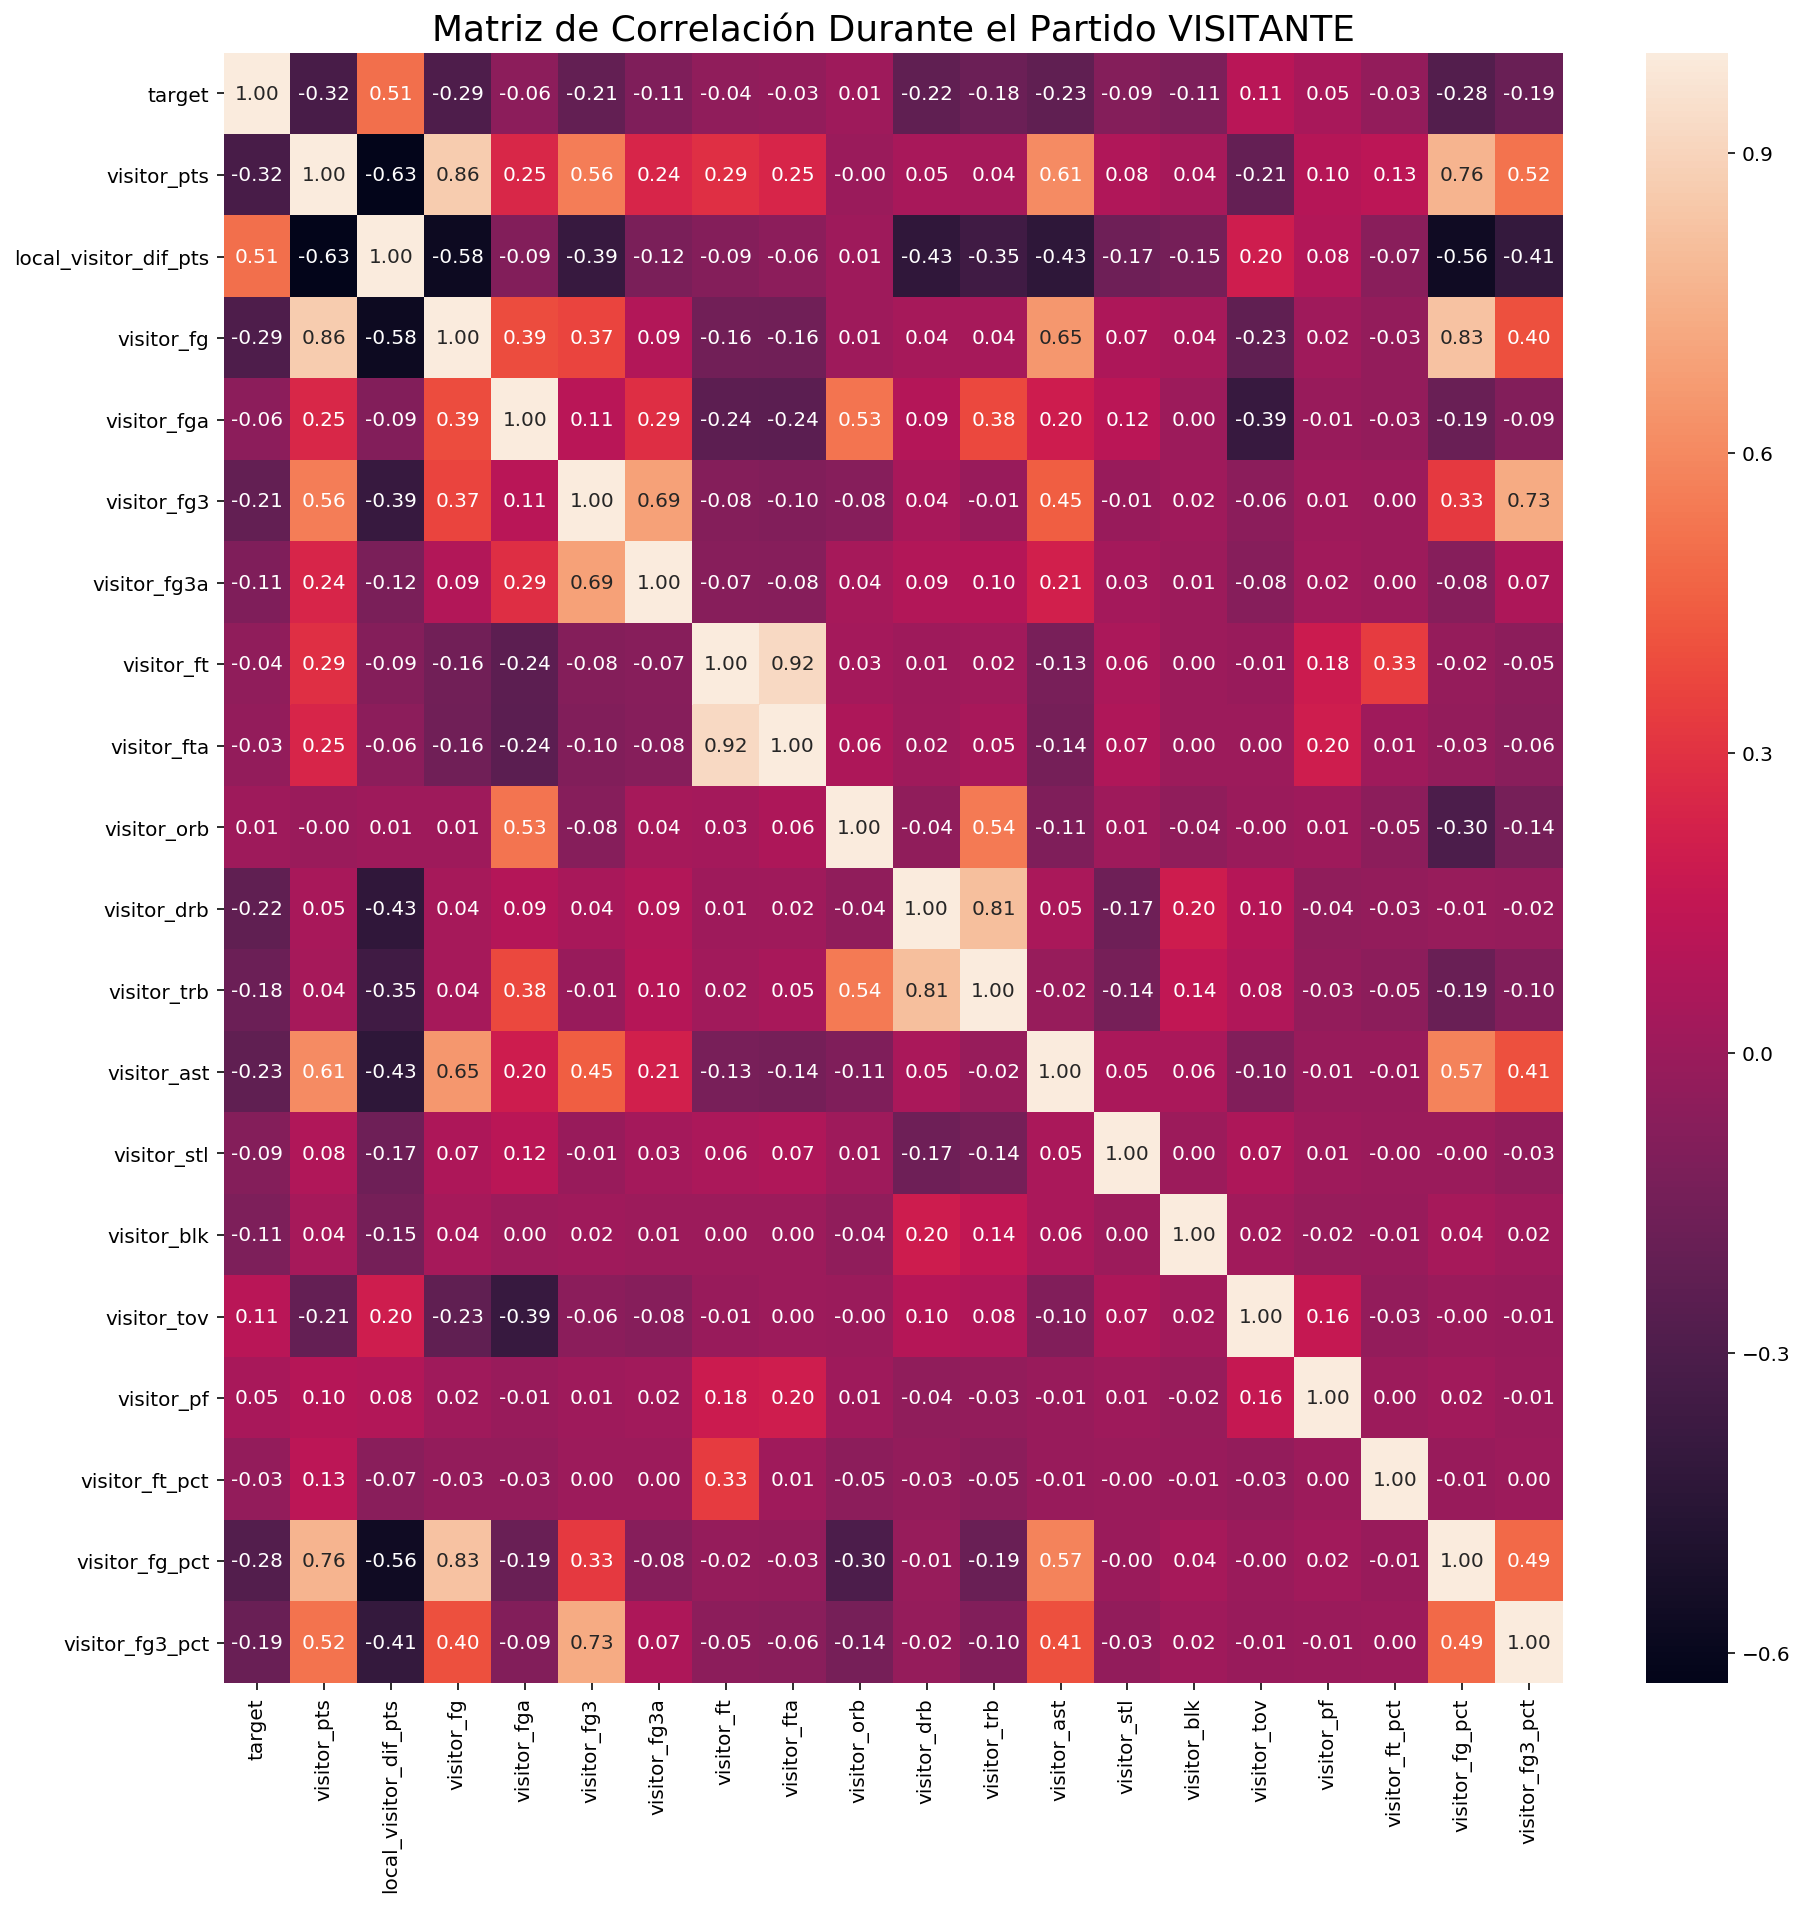

In [18]:
# Heatmap GAME VISITANTE
import seaborn as sns
plt.figure(figsize=(15, 15))
sns_3 = sns.heatmap(game_data_visitante.corr(), annot=True, fmt='.2f')
sns_3.set_title('Matriz de Correlación Durante el Partido VISITANTE', fontsize=18)

## Selección de Variables Dummy

Usando el test de independencia de chi-cuadrado y Ganancia de la Información

**¿Incluir la totalidad de datos en la selección de variables? o ¿solo seleccionar las variables con los datos de entrenamiento?**

Puede parecer una pregunta tonta y obvia en la respuesta, pero no lo es.

Muchos expertos en el tema debaten respecto a esto, y en mi caso, sobre el último modelo que trabajé para la detección de fraude bancario, el proceso de selección se realizó con la totalidad de los datos (por recomendaciones del profesor, creo que este tipo de modelos son "especiales").

En este aspecto, y por evitar problemas de cualquier índole (por ejemplo el mayor argumento cuando se trabaja con modelos supervisados de clasificacion es tener resultados inflados en TEST), se realiza la selección solo con los datos de entrenamiento.

https://stackoverflow.com/questions/56308116/should-feature-selection-be-done-before-train-test-split-or-after

In [19]:
partidos = data[all_variables]

from sklearn.model_selection import train_test_split


variables, target = partidos.iloc[:, :-1], partidos.iloc[:, -1:]

x_train, x_test, y_train, y_test = train_test_split(variables, target, test_size = 0.30, random_state=1)
# Cuidado con el Random_state, hay que realizar diversas pruebas para no seleccionar siempre el mismo
# conjunto de datos y se tenga un sesgo sobre las variables

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4066, 98)
(1743, 98)
(4066, 1)
(1743, 1)


In [21]:
from sklearn.feature_selection import SelectKBest, chi2

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(x_train[dummy], y_train)
x_train_fs = fs.transform(x_train[dummy])
x_test_fs = fs.transform(x_test[dummy])

mask = fs.get_support()
chi2_variables = x_train[dummy].columns[mask]

chi2_var = []
for b in range(len(fs.scores_)):
    if fs.scores_[b] > mean(fs.scores_):
        chi2_var.append(chi2_variables[b])
        print(chi2_variables[b])

local_played_prorrogue_two_days_ago
Div_local_Northwest
Div_local_Pacific
Div_local_Southeast
Conf_visitor_Este
Div_visitor_Southeast
visitor_played_previous_date
visitor_played_two_days_ago
visitor_played_three_days_ago
visitor_played_prorrogue_three_days_ago


0: local_played_previous_date   0.004792194693426954
1: local_played_two_days_ago   0.10248628422191709
2: local_played_three_days_ago   0.09139203456491637
3: local_played_prorrogue_previous_date   1.8318007587577025
4: local_played_prorrogue_two_days_ago   6.384589388365216
5: local_played_prorrogue_three_days_ago   1.8274951742062266
6: Conf_local_Este   1.0416880877334551
7: Div_local_Atlantic   0.6685286135548474
8: Div_local_Central   1.113761663264697
9: Div_local_Northwest   7.152926129295153
10: Div_local_Pacific   4.169742433124352
11: Div_local_Southeast   4.128075992114299
12: Div_local_Southwest   1.02765747798342
13: Conf_visitor_Este   2.684004972606048
14: Div_visitor_Atlantic   0.0009053860219243146
15: Div_visitor_Central   1.079508061385642
16: Div_visitor_Northwest   1.4233913859265637
17: Div_visitor_Pacific   0.04070987389743503
18: Div_visitor_Southeast   3.35675874207771
19: Div_visitor_Southwest   2.1236973143637985
20: visitor_played_previous_date   7.16235467

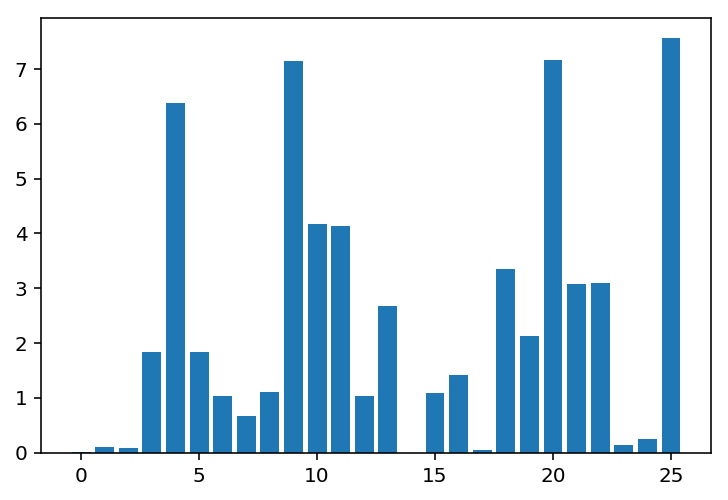

In [22]:
# scores del chi-square
for i in range(len(fs.scores_)):
    print('%d: ' % i + str(chi2_variables[i]) +"   "+  str(fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [23]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

fs = SelectKBest(score_func=mutual_info_classif, k='all', )
fs.fit(x_train[dummy], y_train)
x_train_fs = fs.transform(x_train[dummy])
x_test_fs = fs.transform(x_test[dummy])

mask = fs.get_support()
info_variables = x_train[dummy].columns[mask]

# Seleccionamos aquellas variables que tienen un score superior a la media (evaluar este criterio...)
info_var = []
for b in range(len(fs.scores_)):
    if fs.scores_[b] > mean(fs.scores_):
        info_var.append(info_variables[b])
        print(info_variables[b])

local_played_two_days_ago
local_played_prorrogue_previous_date
local_played_prorrogue_three_days_ago
Div_local_Atlantic
Div_local_Southeast
Div_local_Southwest
Conf_visitor_Este
Div_visitor_Central
Div_visitor_Northwest
Div_visitor_Southwest


0: local_played_previous_date   0.0
1: local_played_two_days_ago   0.014919147088262585
2: local_played_three_days_ago   0.0
3: local_played_prorrogue_previous_date   0.0062624183300290515
4: local_played_prorrogue_two_days_ago   0.0
5: local_played_prorrogue_three_days_ago   0.004030166569076066
6: Conf_local_Este   0.0
7: Div_local_Atlantic   0.0069925461917697
8: Div_local_Central   0.0
9: Div_local_Northwest   0.0
10: Div_local_Pacific   0.0
11: Div_local_Southeast   0.005179732158832495
12: Div_local_Southwest   0.010696288672066734
13: Conf_visitor_Este   0.010666456096561694
14: Div_visitor_Atlantic   0.0
15: Div_visitor_Central   0.008491963359964272
16: Div_visitor_Northwest   0.013283545839102295
17: Div_visitor_Pacific   0.0
18: Div_visitor_Southeast   0.0
19: Div_visitor_Southwest   0.0043887897001742004
20: visitor_played_previous_date   0.0
21: visitor_played_two_days_ago   0.0
22: visitor_played_three_days_ago   0.0
23: visitor_played_prorrogue_previous_date   0.00042910

<BarContainer object of 26 artists>

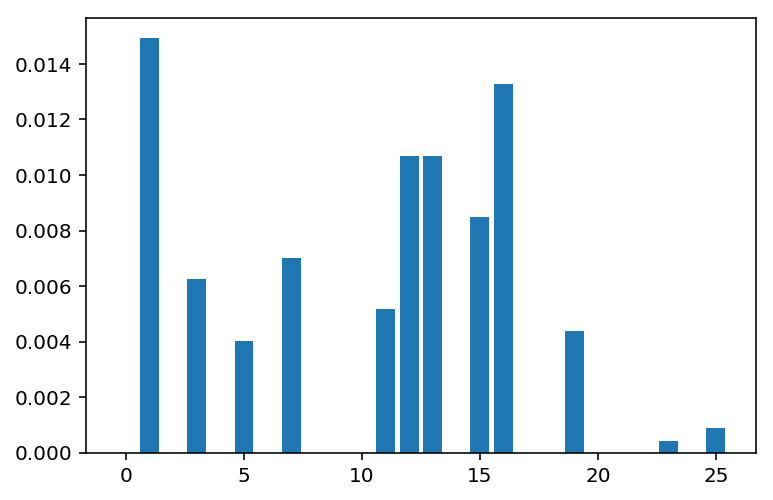

In [24]:
# scores del chi-square
for i in range(len(fs.scores_)):
    print('%d: ' % i + str(info_variables[i]) +"   "+  str(fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

https://www.youtube.com/watch?v=U9h1xkNELvY

https://machinelearningmastery.com/information-gain-and-mutual-information/

https://blog.quantinsti.com/gini-index/

Este resultados me gusta más (principalmente por la lógica de las variables).

Sobre el test de independencia de chi-cuadrado me parece subjetivo los resultados, en gran parte porque el cálculo del test se basa en una matriz de confusion sobre la frecuencia de los resultados. Esto puede contribuir a relaciones de dependecia espúrea.

En cuanto a la Ganancia de Información Mutua, es posible que sea mas preciso en estos casos porque sus calculos son utilizados en procesos de construccion de árboles de decision.

La Información  Mutua (es lo mismo que Ganancia de la Informacion) mide la reducción de la incertidumbre para una variable dado un valor conocido de la otra variable.

## Analisis de Matriz de Correlación

### Importante:

El descarte de variables por escasez de correlación o por multicolinealidad solo tiene sentido si se va a plantear un modelo apoyado en estimaciones lineales, de lo contrario la exclusión de estas contribuye al deteriodo del funcionamiento de otros modelos, por ejemplo, cualquiera derivado de "árboles de decisión".

El principal argumento es que la medida de dependencia entre variables no necesariamente es lineal, y de ser lineal, los algoritmos basados en árboles de decisión dividen entre sus funciones lógicas de decisión las variables que son perfectamente correlacionadas.


----------------------------------------------------------------------------------------------------------------------

## Pendiente de actualizar...

Sobre la variable **target** descartamos las siguientes variables:

**LOCAL_porcentajeVictorias** y escogemos LOCAL_porcentaje_victoria_LOCAL dado que esta tiene mayor nivel de correlación con la variable Target, y no se escogen ambas porque estas estan muy correlacionadas entre si (.86)

**LOCAL_Posicion_division** y escogemos LOCAL_Posicion dado que esta tiene mayor nivel de correlación con la variable Target, y no se escogen ambas porque estas estan muy correlacionadas entre si (.83)

**LOCAL_Posicion_conferencia** y escogemos LOCAL_Posicion dado que esta tiene mayor nivel de correlación con la variable Target, y no se escogen ambas porque estas estan muy correlacionadas entre si (.97)

**Conf_local_west** y escogemos Conf_local_east por la inversa correlación perfecta que existe entre estas. No tiene sentido contemplar ambas ya que una contiene la información de la otra cuando toma valor cero.

Si existe la posibilidad de descartar otra variable porque pueda generar ruido en el modelo sería **LOCAL_Racha** pero dejemos esta variable mientras tanto.

## Selección de Variables por Factor de Inflación de la Varianza (VIF)

La existencia de multicolinealidad --explicación de variables independientes entre si mediante una combinación lineal de otras variables independientes-- es un problema grave en cualquier método estadístico basado en estimaciones lineales. Una de las técnicas que se puede utilizar para identificar este problema es el VIF.

**El objetivo principal es eliminar aquellas variables que se explican entre si.**

Vamos a calcular el valor del VIF para todas las variables menos la objetivo. Para esto se realiza una regresión lineal de cada una de las variables frente al resto y aplicamos la fórmula del VIF


$$
    VIF_i = \frac{1}{1 - R_i^2}
$$

El valor del VIF se encuentra acotado ente 1 (no existe multicolinealidad) e infinito (existe una multicolinealidad perfecta). 

---------------------------------------------------------------------------------------------------------------------

Al ser una regresión simple, el coeficiente de determinacion (R-square) es simplemente el cuadrado del coeficiente de correlación de Pearson.

En este contexto, mientras más cercano a 1 mejor, porque quiere decir que menos correlación tiene una variable respecto a la otra.


Excluimos las variables que tengan VIF mayor a 5 porque son aquellas que tienen un R-square mayor a 0,8

In [25]:
from sklearn.linear_model import LinearRegression

def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)
        
        x = data[x_features]
        y = data[y_featue]
        
        model.fit(data[x_features], data[y_featue])
        
        if model.score(data[x_features], data[y_featue]) == 1:
            result[y_featue] = Infinity
        else:
            result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
    
    return result


calculateVIF(partidos.loc[:,partidos.columns != 'target']) # Excluimos la variale de estuido

,local_pts,local_visitor_dif_pts,local_fg,local_fga,local_fg3,local_fg3a,local_ft,local_fta,local_orb,local_drb,...,Div_visitor_Northwest,Div_visitor_Pacific,Div_visitor_Southeast,Div_visitor_Southwest,visitor_played_previous_date,visitor_played_two_days_ago,visitor_played_three_days_ago,visitor_played_prorrogue_previous_date,visitor_played_prorrogue_two_days_ago,visitor_played_prorrogue_three_days_ago
VIF,inf,inf,73365.360565,47.206962,8824.818799,9.445436,21925.52435,25.77857,inf,4.503600e+15,...,inf,inf,inf,inf,12.048209,6.825488,1.752551,1.06055,1.045387,1.047729


Como la funcion anterior da salida a cada una de las variables con su VIF correspondiente, ahora construimos una funcion para la exclusión de aquellas con VIF mayor a 5. 

**La salida de esta funcion es una lista de variables**

In [26]:
def selectDataUsingVIF(data, max_VIF = 5):
    result = data.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.values.max() > max_VIF:
        col_max = np.where(VIF == VIF.values.max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        print('Se ha eliminado: ----- '+ str(features[col_max]) + " ----- VIF:  " + 
              str(VIF[features[col_max]].values))
        
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result

variables_vif = list(calculateVIF(selectDataUsingVIF(partidos.loc[:,partidos.columns != 'target'], 5)).columns)
# Evaluar algún cambio en el código ya que se observa un error
# Antes de introducir la totalidad de variables, hay que hacer un descarte manual derivado del análisis 
# de las matrices de correlación

Se ha eliminado: ----- local_visitor_dif_pts ----- VIF:  [inf]
Se ha eliminado: ----- local_drb ----- VIF:  [inf]
Se ha eliminado: ----- visitor_drb ----- VIF:  [inf]
Se ha eliminado: ----- Div_local_Atlantic ----- VIF:  [inf]
Se ha eliminado: ----- Div_local_Central ----- VIF:  [inf]
Se ha eliminado: ----- Div_visitor_Atlantic ----- VIF:  [inf]
Se ha eliminado: ----- Div_visitor_Central ----- VIF:  [inf]
Se ha eliminado: ----- visitor_fg ----- VIF:  [71498.35740242]
Se ha eliminado: ----- local_fg ----- VIF:  [36800.96610449]
Se ha eliminado: ----- visitor_fga ----- VIF:  [48.12211398]
Se ha eliminado: ----- local_fga ----- VIF:  [47.15473426]
Se ha eliminado: ----- VISITANTE_Ultimos10Derrotas ----- VIF:  [91.55704655]
Se ha eliminado: ----- local_Home_win ----- VIF:  [25.05899123]
Se ha eliminado: ----- VISITANTE_porcentaje_victoria_Ultimos10 ----- VIF:  [47.05441344]
Se ha eliminado: ----- local_Dif_leader ----- VIF:  [8.46674466]
Se ha eliminado: ----- visitor_Dif_leader ----- VIF:

El paso anterior esta pendiente de evaluación, solo se ha dejado para tener el código listo para ejecución



## Ajustes de tipos de variables (¿? Necesario ¿?)

In [27]:
#partidos['fecha'] = pd.to_datetime(partidos['fecha'].astype(str), format='%Y%m%d')
#partidos.dtypes

---------------------------------------------------------------------------------------------------------------------

## TEMPORADA 2017-2018
temporada_2017_2018 = data_1_clean[data_1_clean['fecha'] >= '2017-09-01']
temporada_2017_2018 = temporada_2017_2018[temporada_2017_2018['fecha'] <= '2018-04-11'].sort_values('fecha')

temporada_2017_2018 = temporada_2017_2018.reset_index(drop=True)


temporada_2017_2018.head(5)

## TEMPORADA 2018-2019
temporada_2018_2019 = data_1_clean[data_1_clean['fecha'] >= '2018-09-01']
temporada_2018_2019 = temporada_2018_2019[temporada_2018_2019['fecha'] <= '2019-04-10'].sort_values('fecha')

temporada_2018_2019 = temporada_2018_2019.reset_index(drop=True)


temporada_2018_2019.head(5)

---------------------------------------------------------------------------------------------------------------------

# Parte II: ¿Qué Modelo elegir?

Antes de comenzar con la creación del modelo es necesario separar la muestra para el entrenamiento y test.

Para el correcto funcionamiento de las funciones creadas en esta sección es **estrictamente necesario que los datos de test y entrenamientos tengan el mismo tamaño**.

Sabemos que este no es el mejor enfoque, así como la inclusión de la totalidad de variables, pero es el más sencillo y rápido que ayudará a determinar cuales son los modelos, en su version mas sencilla, con mayor poder de predicción en entrenamiento.

Es importante destacar que no es relevante los resultados en test, este análisis busca determinar qué tipo de modelo se ajusta mejor a los datos.

In [28]:
# un train y test del mismo tamaño para hacer la primera labor de investigacion del modelo
#variables = partidos.loc[:, partidos.columns != 'fecha'] 


#variables_2017_2018 = temporada_2017_2018.loc[:,temporada_2017_2018.columns != 'fecha']

#variables_2018_2019 = temporada_2018_2019.loc[:,temporada_2018_2019.columns != 'fecha']

In [29]:
from sklearn.model_selection import train_test_split
# variables_2017_2018, target_2017_2018 = temporada_2017_2018.iloc[:, :-1], temporada_2017_2018.iloc[:, -1:]
#variables_2018_2019, target_2018_2019 = temporada_2018_2019.iloc[:, :-1], temporada_2018_2019.iloc[:, -1:]

variables = partidos[1:] # .copy si es par el len()

variables, target = variables.iloc[:, :-1], variables.iloc[:, -1:]

x_train, x_test, y_train, y_test = train_test_split(variables, target, test_size = 0.5, random_state=1) 

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2904, 98)
(2904, 98)
(2904, 1)
(2904, 1)


## Presencia de Datos Desbalanceados (¿?) Pendiente de Evaluar

### A priori esta diferencia se ha disminuido con la inclusión de más datos, hasta hora se tiene un 60-40%

https://towardsdatascience.com/what-to-do-when-your-classification-dataset-is-imbalanced-6af031b12a36


En teoria se deberia realizar una operacion de **Oversampling** ¿por que?:

Cuando el conjunto de datos no representa todas las clases de datos por igual, el modelo podría ajustarse en exceso a la clase que está más representada en su conjunto de datos (en nuestro caso como es de esperarse mayor juegos ganados por parte del local) y pasar por alto la existencia de la clase minoritaria (los juegos perdidos del local).

En este contexto, de forma exagerada, imaginemos que nuestro modelo siempre estima juego ganado para local, dado los datos, sobre la totalidad de resultados igual a 1 tendrá un accuracy aprox. igual a 60%.


In [31]:
partidos.target.value_counts() 

1    3389
0    2420
Name: target, dtype: int64

## Cómo evaluar correctamente un modelo desbalanceado:

### Falta investigar

https://en.wikipedia.org/wiki/Precision_and_recall 

Hay que evaluar si se realiza el oversampling o no. De no realizarse, es importante las métricas de evaluación del modelo:

#####  colocar formula con latex

El **accuracy** puede ser una métrica engañosa para conjuntos de datos desequilibrados. Considere una muestra con 95 valores negativos y 5 positivos. La clasificación de todos los valores como negativos en este caso da un puntaje de precisión de 0.95. Hay muchas métricas que no sufren este problema. 

Por ejemplo, la precisión equilibrada (bACC) normaliza las predicciones verdaderas positivas y negativas verdaderas por el número de muestras positivas y negativas, respectivamente, y divide su suma entre dos:


##### colocar formula con latex

Para el ejemplo anterior (95 muestras negativas y 5 positivas), clasificarlas todas como negativas da un puntaje de precisión equilibrado de 0,5 (el puntaje máximo de bACC es uno), que es equivalente al valor esperado de una suposición aleatoria en un conjunto de datos equilibrado. La precisión equilibrada puede servir como una medida de rendimiento general para un modelo, ya sea que las etiquetas verdaderas estén o no desequilibradas en los datos, suponiendo que el costo de FN (falso negativo) sea el mismo que FP (falso positivo).


## Dataframe de comparación de modelos (Gini)

In [32]:
from ipynb.fs.full.funciones_modelo import *

dict_trained_model = train_method(x_train, y_train,x_test,y_test,"LR")
method_list = ['LR','LASSO','LOGR','RIDGE', 'DT','RFR','RFC','GBR'] 
df_result_summary = pd.DataFrame(index=method_list,columns=['GINI-train','GINI-test', 'Caída %'])
C1 = []
C2 = []
C3 = []
for method in method_list:
    dict_trained_model[method] = train_method(x_train, y_train,x_test,y_test,method)
    # Predicciones - REGRESIONES
    if method in ['LR','LASSO','RIDGE','RFR','GBR']: 
        y_pred_train = dict_trained_model[method]['model'].predict(x_train)
        y_pred_test = dict_trained_model[method]['model'].predict(x_test)
    else: # Predicciones - CLASIFICADORES
        y_pred_train = dict_trained_model[method]['model'].predict_proba(x_train)[:,1]
        y_pred_test = dict_trained_model[method]['model'].predict_proba(x_test)[:,1]
    # Calculo de GINI
    gini_score_train = GS(y_train,y_pred_train)
    C1.append(gini_score_train)
    gini_score_test = GS(y_test,y_pred_test)
    C2.append(gini_score_test)
    diferencia = (1-(gini_score_test/gini_score_train)) * 100
    C3.append(diferencia)
    
# Append al dataframe
df_result_summary ['GINI-train'] = C1
df_result_summary ['GINI-test'] = C2
df_result_summary ['Caída %'] = C3

# Print
df_result_summary.sort_values('GINI-train', ascending=False)

,GINI-train,GINI-test,Caída %
DT,1.000000,0.413101,58.689857
RFR,1.000000,0.743372,25.662791
RFC,1.000000,0.747599,25.240082
GBR,0.999974,0.781579,21.840038
RIDGE,0.856882,0.829628,3.180605
LR,0.856867,0.828430,3.318761
LASSO,0.834919,0.808082,3.214366
LOGR,0.221502,0.206369,6.831801


## Dataframe de comparación de modelos (Accuracy)

#### Accuracy (exactitud)
La exactitud es una métrica para evaluar modelos de resultados de clasificación. 

Informalmente, la exactitud es la fracción de predicciones que el modelo realizó correctamente.

Formalmente, la exactitud tiene la siguiente definición:

$A = \frac{VP + VN}{VP + FP + VN + FN}$

Donde: **VP** = Verdaderos positivos, **VN** = Verdaderos negativos, **FP** = Falsos positivos y **FN** = Falsos negativos

In [33]:
from ipynb.fs.full.funciones_modelo import *

data = []
for method in method_list:
    dict_trained_model[method] = train_method(x_train, y_train,x_test,y_test,method)
#    print (dict_trained_model[method])
    data.append([method, dict_trained_model[method]['accuracy_train'], dict_trained_model[method]['accuracy_test']])

df_result_summary_2 = pd.DataFrame(data,columns=['method','accuracy_train','accuracy_test']) 
                
df_result_summary_2.sort_values('accuracy_train', ascending = False)

,method,accuracy_train,accuracy_test
4,DT,1.000000,7.148760e-01
6,RFC,1.000000,7.992424e-01
7,GBR,0.938518,4.457833e-01
5,RFR,0.922487,4.150057e-01
2,LOGR,0.598485,6.112259e-01
3,RIDGE,0.514863,4.762223e-01
0,LR,0.514862,-3.349527e+06
1,LASSO,0.481262,4.500705e-01


## ¿Qué modelo elegir?

#### me falta adornar la justificacion, pendiente de leer un poco de teoría

Este punto es muy importante en el proceso, es lo que determina nuestra elección por el tipo de modelo que vamos a desarrollar.

Se comparan los distintos modelos basados en árboles de decisión y en estimaciones lineales.

Se observa que el modelo basado en árbol de decisión que mejor se ajusta a los datos de entrenamiento es el Random Forest Classifier.

## División en Entrenamiento y Test 

In [34]:
from sklearn.model_selection import train_test_split

variables = partidos.copy()

target = partidos.iloc[:, -1:]

x_train, x_test, y_train, y_test = train_test_split(variables, target, test_size = 0.30, random_state=1)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4066, 99)
(1743, 99)
(4066, 1)
(1743, 1)


# Random Forest Classifier

## Selección de Variables con RF

In [36]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier


list_var = list(set(x_train.columns))

print ("FEATURE IMPORTANCE Random Forest Classifier")
print("")

       
forest = RandomForestClassifier()

forest.fit(x_train, y_train) # Dilema: ¿seleccionamos todos los datos o solo entrenamiento? Entrenamiento

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

# Ranking
#for f in range(len(variables.columns)):
#    print("%d. %s (%f) " % (f + 1, list_var[indices[f]], importances[indices[f]]))

FEATURE IMPORTANCE Random Forest Classifier



In [37]:
rf_variables = []
for f in range(65): # eleccion arbitraria, esto luego se va probando hasta determinar el optimo...
    rf_variables.append(list_var[indices[f]])
rf_variables

['local_fg_pct',
 'local_pf',
 'LOCAL_Ultimos10Victorias',
 'visitor_pts',
 'local_Home_lose',
 'visitor_played_three_days_ago',
 'visitor_played_prorrogue_previous_date',
 'local_ft_pct',
 'visitor_ast',
 'avg_distance_place_local_played',
 'local_fg',
 'visitor_played_two_days_ago',
 'local_Home_win',
 'visitor_Conf_position',
 'Div_local_Northwest',
 'Div_visitor_Northwest',
 'Div_visitor_Pacific',
 'LOCAL_Ultimos10Derrotas',
 'visitor_fg',
 'Div_local_Southeast',
 'Div_local_Central',
 'local_visitor_dif_pts',
 'Div_visitor_Central',
 'visitor_fg3_pct',
 'Sueldo local',
 'distance_between_stadiums',
 'local_Percentagewl',
 'local_fga',
 'local_fg3_pct',
 'local_played_local',
 'visitor_Dif_leader',
 'Conf_local_Este',
 'local_drb',
 'local_played_three_days_ago',
 'Div_local_Southwest',
 'visitor_fg3a',
 'local_played_prorrogue_two_days_ago',
 'local_blk',
 'local_played_prorrogue_three_days_ago',
 'local_fg3a',
 'visitor_trb',
 'VISITANTE_Racha',
 'Div_visitor_Atlantic',
 'visitor

## Selección de Variables con Algoritmo Genético (GA)

In [38]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import re
from deap import creator, base, tools, algorithms #GENETIC ALGORITHM LIBRARY - requirement: pip install deap
import random
from sklearn import metrics

In [39]:
print ("GENETIC ALGORITHM FOR FEATURE SELECTION:")

list_inputs = set(variables.columns)

#####
#SETING UP THE GENETIC ALGORITHM and CALCULATING STARTING POOL (STARTING CANDIDATE POPULATION)
#####
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(list_inputs))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
def evalOneMax(individual):
    return sum(individual),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

NPOPSIZE = len(x_train.columns) #RANDOM STARTING POOL SIZE
population = toolbox.population(n=NPOPSIZE)

GENETIC ALGORITHM FOR FEATURE SELECTION:


In [40]:
from sklearn.metrics import roc_auc_score
#####
#ASSESSING GINI ON THE STARTING POOL
#####
dic_gini={}

for i in range(np.shape(population)[0]): 

    # TRASLATING DNA INTO LIST OF VARIABLES (1-81)
    var_model = []    
    for j in range(np.shape(population)[0]): 
        if (population[i])[j]==1:
            var_model.append(list(list_inputs)[j])

    # ASSESSING GINI INDEX FOR EACH INVIVIDUAL IN THE INITIAL POOL 

    #X_train = partidos[var_model]
    #Y_train = partidos["target"]
    
    X_train = x_train.copy()
    Y_train = y_train.copy()

    ######
    # CHANGE_HERE - START: YOU ARE VERY LIKELY USING A DIFFERENT TECHNIQUE BY NOW. SO CHANGE TO YOURS.
    #####      

    lr = RandomForestClassifier()
    model = lr.fit(X_train, Y_train)
    Y_predict = model.predict_proba(X_train)[:,1]
    
    #yo_pred = result.predict_proba(Xo_std)[:,1] #este es para tener la prob. cuando usamos skit.learn    
    
    
    
    
    #lr = sm.Logit(Y_train, X_train)
    #model=lr.fit()   
    #Y_predict=model.predict(X_train)
    ######
    # CHANGE_HERE - END: YOU ARE VERY LIKELY USING A DIFFERENT TECHNIQUE BY NOW. SO CHANGE TO YOURS.
    #####             


    ######
    # CHANGE_HERE - START: HERE IT USES THE DEVELOPMENT GINI TO SELECT VARIABLES, YOU SHOULD A DIFFERENT GINI. EITHER THE OOT GINI OR THE SQRT(DEV_GINI*OOT_GINI)
    #####                
    fpr, tpr, thresholds = metrics.roc_curve(Y_train, Y_predict)
    auc = metrics.auc(fpr, tpr)
    
    gini_power= 2*roc_auc_score(Y_train, Y_predict)-1
    #gini_power = abs(2*auc-1)
    ######
    # CHANGE_HERE - END: HERE IT USES THE DEVELOPMENT GINI TO SELECT VARIABLES, YOU SHOULD A DIFFERENT GINI. EITHER THE OOT GINI OR THE SQRT(DEV_GINI*OOT_GINI)
    #####                
    
    gini=str(gini_power)+";"+str(population[j]).replace('[','').replace(', ','').replace(']','')
    dic_gini[gini]=population[j] 
    
list_gini=sorted(dic_gini.keys(),reverse=True)

In [41]:
#####
#GENETIC ALGORITHM MAIN LOOP - START
# - ITERATING MANY TIMES UNTIL NO IMPROVMENT HAPPENS IN ORDER TO FIND THE OPTIMAL SET OF CHARACTERISTICS (VARIABLES)
#####
sum_current_gini=0.0
sum_current_gini_1=0.0
sum_current_gini_2=0.0
first=0    
OK = 1
a=0
while OK:  #REPEAT UNTIL IT DO NOT IMPROVE, AT LEAST A LITLE, THE GINI IN 2 GENERATIONS
    a=a+1
    print ('loop ', a)
    OK=0

    ####
    # GENERATING OFFSPRING - START
    ####
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1) #CROSS-X PROBABILITY = 50%, MUTATION PROBABILITY=10%
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population =toolbox.select(offspring, k=len(population))
    ####
    # GENERATING OFFSPRING - END
    ####

    sum_current_gini_2=sum_current_gini_1
    sum_current_gini_1=sum_current_gini
    sum_current_gini=0.0

    #####
    #ASSESSING GINI ON THE OFFSPRING - START
    #####
    for j in range(np.shape(population)[0]): 
        if population[j] not in dic_gini.values(): 
            var_model = [] 
            for i in range(np.shape(population)[0]): 
                if (population[j])[i]==1:
                    var_model.append(list(list_inputs)[i])
            
            X_train= x_train.copy()
            Y_train= y_train.copy()
            
            ######
            # CHANGE_HERE - START: YOU ARE VERY LIKELY USING A DIFFERENT TECHNIQUE BY NOW. SO CHANGE TO YOURS.
            #####    
    
            
            lr = RandomForestClassifier()
            model = lr.fit(X_train, Y_train)
            Y_predict = model.predict_proba(X_train)[:,1]
            
            ######
            # CHANGE_HERE - END: YOU ARE VERY LIKELY USING A DIFFERENT TECHNIQUE BY NOW. SO CHANGE TO YOURS.
            #####            
                       
            
            ######
            # CHANGE_HERE - START: HERE IT USES THE DEVELOPMENT GINI TO SELECT VARIABLES, YOU SHOULD A DIFFERENT GINI. EITHER THE OOT GINI OR THE SQRT(DEV_GINI*OOT_GINI)
            #####                       
            fpr, tpr, thresholds = metrics.roc_curve(Y_train, Y_predict)
            auc = metrics.auc(fpr, tpr)
            gini_power= 2*roc_auc_score(Y_train, Y_predict)-1   
            #gini_power = abs(2*auc-1)
            ######
            # CHANGE_HERE - END: HERE IT USES THE DEVELOPMENT GINI TO SELECT VARIABLES, YOU SHOULD A DIFFERENT GINI. EITHER THE OOT GINI OR THE SQRT(DEV_GINI*OOT_GINI)
            #####                       
           
            gini=str(gini_power)+";"+str(population[j]).replace('[','').replace(', ','').replace(']','')
            dic_gini[gini]=population[j]  
    #####
    #ASSESSING GINI ON THE OFFSPRING - END
    #####

    #####
    #SELECTING THE BEST FITTED AMONG ALL EVER CREATED POPULATION AND CURRENT OFFSPRING - START
    #####           
    list_gini=sorted(dic_gini.keys(),reverse=True)
    population=[]
    for i in list_gini[:NPOPSIZE]:
        population.append(dic_gini[i])
        gini=float(i.split(';')[0])
        sum_current_gini+=gini
    #####
    #SELECTING THE BEST FITTED AMONG ALL EVER CREATED POPULATION AND CURRENT OFFSPRING - END
    #####           
      
    #HAS IT IMPROVED AT LEAST A LITLE THE GINI IN THE LAST 2 GENERATIONS
    print ('sum_current_gini=', sum_current_gini, 'sum_current_gini_1=', sum_current_gini_1, 'sum_current_gini_2=', sum_current_gini_2)
    if(sum_current_gini>sum_current_gini_1+0.0001 or sum_current_gini>sum_current_gini_2+0.0001):
        OK=1
#####
#GENETIC ALGORITHM MAIN LOOP - END
#####


gini_max=list_gini[0]        
gini=float(gini_max.split(';')[0])
features=gini_max.split(';')[1]


####
# PRINTING OUT THE LIST OF FEATURES
#####
adn_variables = []
f=0
for i in range(len(features)):
    if features[i]=='1':
        f+=1
        adn_variables.append(list(list_inputs)[i])
        print ('feature ', f, ':', list(list_inputs)[i])
print ('gini: ', gini)

loop  1
sum_current_gini= 55.99997231357497 sum_current_gini_1= 0.0 sum_current_gini_2= 0.0
loop  2
sum_current_gini= 74.99996657674814 sum_current_gini_1= 55.99997231357497 sum_current_gini_2= 0.0
loop  3
sum_current_gini= 90.99996458133008 sum_current_gini_1= 74.99996657674814 sum_current_gini_2= 55.99997231357497
loop  4
sum_current_gini= 98.99999700687293 sum_current_gini_1= 90.99996458133008 sum_current_gini_2= 74.99996657674814
loop  5
sum_current_gini= 99.0 sum_current_gini_1= 98.99999700687293 sum_current_gini_2= 90.99996458133008
loop  6
sum_current_gini= 99.0 sum_current_gini_1= 99.0 sum_current_gini_2= 98.99999700687293
feature  1 : local_ft_pct
feature  2 : local_pf
feature  3 : local_fg
feature  4 : local_fg3_pct
feature  5 : visitor_played_previous_date
feature  6 : local_played_previous_date
feature  7 : local_blk
feature  8 : distance_local_traveled
feature  9 : local_ft
feature  10 : visitor_fg3a
feature  11 : local_Home_win
feature  12 : visitor_played_three_days_ago


## Hiperparametrización

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def Grid_Search_CV_RFR(X_train, y_train):


    estimator = RandomForestClassifier()
    param_grid = {
        "n_estimators": [500, 1000, 1250, 1500],
        "max_features": ["auto", "sqrt", "log2"],
        "min_samples_split": [2,4,8,16],
        "bootstrap": [True, False],
        "criterion": ['gini', 'entropy'] # se necesitan diversas pruebas, se que default es gini, probar entropy
    }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFC(X_train, X_test, y_train, y_test, best_params):

    estimator = RandomForestClassifier(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("GINI:",GS(y_test,y_predict))
    return y_test,y_predict

In [ ]:
#### Dejo comentado este codigo porque lleva mucho tiempo de ejecucion

for i in range(5):
    print ("Loop: " , i)
    print ("--------------")
    # Es importante dividir el set de datos en partes iguales 50% train y 50% test solo para evaluar
    
    best_score, best_params = Grid_Search_CV_RFR(x_train, y_train)
    y_test , y_predict = RFC(x_train, x_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Resultados del loop anterior, para no volver a ejecutar que consume mucho tiempo:
    

Loop:  0
--------------
GINI: 0.4780002348265111
Best Score: 0.7402501839587933
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
Loop:  1
--------------
GINI: 0.49720817370203996
Best Score: 0.739514348785872
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 100}
Loop:  2
--------------
GINI: 0.4908352431106684
Best Score: 0.7402501839587933
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Loop:  3
--------------
GINI: 0.49748431228447054
Best Score: 0.739514348785872
Best params: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 500}
Loop:  4
--------------
GINI: 0.5102279991476666
Best Score: 0.7387785136129507
Best params: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 500}



GINI: 1.0
Best Score: 1.0
Best params: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 500}
Loop:  4
--------------

# Parte III: Evaluación del modelo


### Modelos a evaluar:

###### Random Forest Classifier
###### Logistic Regression


## Usando Validación Cruzada

Una desventaja de usar un conjunto de datos de test y otro de entrenamiento para la validación del modelo es que hemos perdido una parte importante de nuestros datos (entre el 20% y 30%) en la capacitación del modelo. Esto no es óptimo desde muchos puntos de vista, principalmente por **uso inadecuado de los recursos escasos (datos)**.

¿Pocos datos? Si, para el caso de la NBA es que existen muchos años de datos, sin embargo, a priori se tienen hipótesis de cambios estructurales (forma del juego) que de alguna forma el modelo no podrá diferenciar y es posible que no tenga la capacidad de generalizar sobre datos no observados.

En este contexto, lo mejor que podemos hacer es aprovechar al máximo los datos que tenemos. Para resolver este problema utilizaremos la validación cruzada.

--------------------------------------------------------------------------------------------------------------------

**NOTA:** como parte del proyecto será importante plantear la hipótesis sobre el posible cambio estructural de los datos dado el cambio de juego (posiblemente un juego mas rapido, mas tiros de triples, mas puntos anotados, etc).

Esta hipótesis sobre la generealizacion del modelo se puede abordar realizando un modelo con menos datos y otro con mas datos para posteriormente comparar.

Usamos la función `cross_val_score`. Esta función divide el conjunto de datos en diferentes muestras y entrena con todas menos una, dejando la restante para validación. Este proceso se repite según el número en el que se divida las muestras para la validación.

Otro problema de utilizar esta técnica es saber **cuál es el número óptimo** de divisiones de la muestra.

Estas divisiones de muestra se llaman **folds** determinada por la letra **"k"**. Dentro de los parámetros de `cross_val_score` se usan dos métodos para la division de la muestra,  KFold y StratifiedKFold.

Por ahora utilizaremos como base el enfoque más común en problemas de Machine Learning determinando k= 10 (si los datos lo permiten, sino por defecto k=5).


Mediante `cv` se indica el numero de partes en las que se dividen los datos. La función devuelve un vector con el score de cada uno de los modelos construidos.

https://machinelearningmastery.com/k-fold-cross-validation/

In [47]:
# MUY IMPORTANTE!!!! https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

from sklearn.model_selection import cross_val_score

model_list = {'RFC': RandomForestClassifier(n_estimators=500,
                                           max_features='auto', min_samples_split=16, bootstrap=True),
              'LR': LogisticRegression()}


variable_final = rf_variables.copy()


# Iteracion entre modelos para comparación

dataframe = pd.DataFrame(index=model_list ,columns=['Media Accuracy_train',
                                                    'Desv. Típica Accuracy_train',
                                                    'Media Accuracy_test',
                                                    'Desv. Típica Accuracy_test'])
C1 = []
C2 = []
C3 = []
C4 = []

for method in model_list:
    scores_train = cross_val_score(model_list[method], x_train, y_train, cv = 5, 
                                   scoring='accuracy')#cv variacion cruzada 5 modelos
    scores_test = cross_val_score(model_list[method], x_test, y_test, cv = 5, scoring='accuracy')
    C1.append(np.mean(scores_train))
    C2.append(np.std(scores_train))
    C3.append(np.mean(scores_test))
    C4.append(np.std(scores_test))

# Append al dataframe
dataframe['Media Accuracy_train'] = C1
dataframe['Desv. Típica Accuracy_train'] = C2
dataframe['Media Accuracy_test'] = C3
dataframe[ 'Desv. Típica Accuracy_test'] = C4

print("COMPARACION ACCURACY CON VALIDACION CRUZADA K=5")

dataframe.sort_values('Media Accuracy_test', ascending=False)

COMPARACION ACCURACY CON VALIDACION CRUZADA K=5


,Media Accuracy_train,Desv. Típica Accuracy_train,Media Accuracy_test,Desv. Típica Accuracy_test
RFC,1.000000,0.000000,1.000000,0.000000
LR,0.613377,0.012651,0.588063,0.011633


In [44]:
dataframe = pd.DataFrame(index=model_list ,columns=['Accuracy_test',
                                                    'Accuracy_train'
                                                    ])
C1 = []
C2 = []

#Declarar aquí la lista de variables de selección final

#variable_final = rf_variables.copy()


for method in model_list:
    
    result_test = model_list[method].fit(x_test[variable_final], y_test)    
    y_pred_test = result_test.predict(x_test[variable_final]) #Vector de resultados (1 y 0)
    y_prob_pred_test = result_test.predict_proba(x_test[variable_final])[:,1] #Probabilidad del resultado = 1
    score_test = result_test.score(x_test[variable_final], y_test)

    result_train = model_list[method].fit(x_train[variable_final], y_train)    
    y_pred_train = result_train.predict(x_train[variable_final]) #Vector de resultados (1 y 0)
    y_prob_pred_train = result_train.predict_proba(x_train[variable_final])[:,1] #Probabilidad del resultado = 1 
    score_train = result_train.score(x_train[variable_final], y_train)

    C1.append(score_test)
    C2.append(score_train)

# Append al dataframe
dataframe['Accuracy_test'] = C1
dataframe['Accuracy_train'] = C2


print("COMPARACION ACCURACY FINAL")

dataframe.sort_values('Accuracy_test', ascending = False)

COMPARACION ACCURACY FINAL


,Accuracy_test,Accuracy_train
RFC,0.958692,0.955239
LR,0.576018,0.586572


### NOTA: 

Si existe un mal desempeño del modelo en el resultado anterior, se debe evaluar métodos que limiten la caida del accuracy o cualquier otra métrica de evaluación en los datos de test

model_list = {'RFC': RandomForestClassifier(n_estimators=1000,
                                           max_features='auto'),


Accuracy del modelo en TEST usando Validación Cruzada seleccinando el mejor de k = 5
[0.79083095 0.78796562 0.81948424 0.81088825 0.7925072 ]
-------------------------------------------------------------------
Media de Accuracy
0.8003352518104423
-------------------------------------------------------------------
Accuracy del modelo en TEST usando Validación Cruzada seleccinando el mejor de k = 5
[0.58452722 0.60458453 0.59598854 0.57020057 0.58501441]
-------------------------------------------------------------------
Media de Accuracy
0.5880630537641511
-------------------------------------------------------------------

# Código para guardar el modelo en su posterior uso


filename = 'nba_pred_model_RFC_best.sav'
pickle.dump(model_list["RFC"], open(filename, 'wb'))


#Guardamos la lista de variables
with open('best_rf_variables.txt', 'w') as f:
    for item in rf_variables:
        f.write("%s\n" %item)

# Abrimos la lista de variables        
with open('best_rf_variables.txt', 'r') as f:
    best_rf_variables = f.read().splitlines()
        


## Métricas de rendimiento para modelos de clasificación binarios
En los problemas de clasificación de clase binarios, en la que los resultados se etiquetan positivos (P) o negativos (N), hay cuatro posibles resultados que se pueden obtener:
* Verdaderos Positivos (TP)
* Verdaderos Negativos (TN)
* Falsos Positivos (FP) o Error tipo I
* Falsos Negativos (FN) o Error de tipo II

Para facilitar el análisis, los resultados se pueden organizar en una matriz de confusión:

$$
\left|
\begin{array}{cc}
TP & FP \\
FN & TN \\
\end{array}
\right|
$$

A partir de estos resultados se pueden construir diferentes métricas para evaluar la calidad de los modelos construidos, algunas de las más utilizadas son:
* Precisión (Accuracy): $A = \frac{TP + TN}{TP + FP + TN + FN}$
* Exactitud (Precision): $P = \frac{TP}{TP + FP}$
* Exhaustividad (Recall): $R = \frac{TP}{TP + FN}$
* Área bajo la curva ROC (ROC AUC)

En *scikit-learn* todas estas métricas se encuentran en la librería `metrics`. Se pueden probar en un conjunto de datos conocido.

La matriz de confusión es 
[[   0 1681]
 [   0 2385]]
Precisión (Accuracy): 0.5865715691096901
Exactitud (Precision): 0.5865715691096901
Exhaustividad (Recall): 1.0
AUC: 0.5


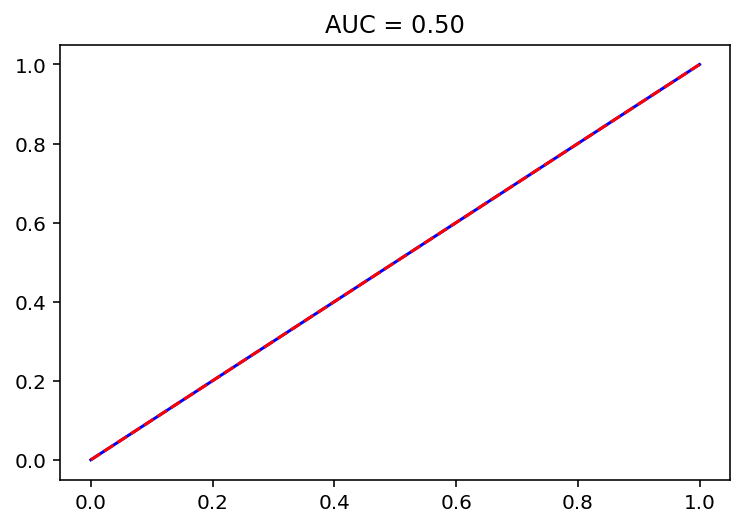

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def metricas(y_true, y_pred):
    print(u'La matriz de confusión es ')
    print(confusion_matrix(y_true, y_pred))

    print(u'Precisión (Accuracy):', accuracy_score(y_true, y_pred))
    print(u'Exactitud (Precision):', precision_score(y_true, y_pred))
    print(u'Exhaustividad (Recall):', recall_score(y_true, y_pred))

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print(u'AUC:', roc_auc)

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title(u'AUC = %0.2f' % roc_auc)
    
metricas(y_train, y_pred_train)

La matriz de confusión es 
[[   0  739]
 [   0 1004]]
Precisión (Accuracy): 0.5760183591508893
Exactitud (Precision): 0.5760183591508893
Exhaustividad (Recall): 1.0
AUC: 0.5


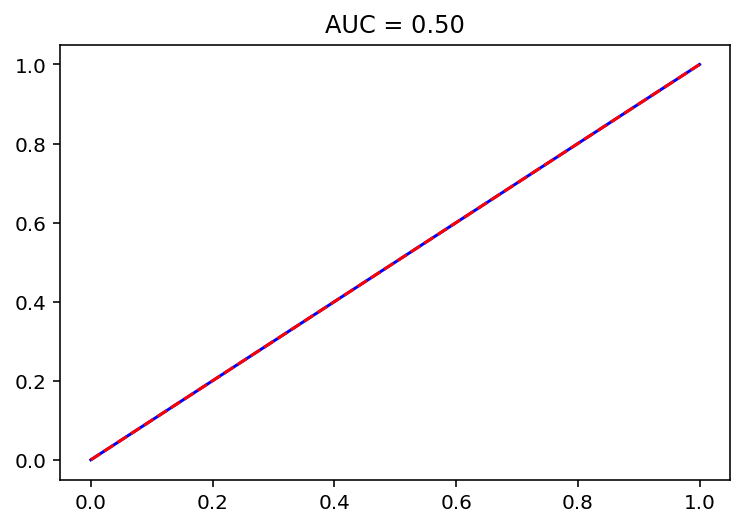

In [46]:
metricas(y_test, y_pred_test)